## Assessment 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv("data_assignment.csv")
# Describe types of the dataset
data.dtypes

Id                    int64
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object

In [3]:
# Describe statistics of the numerical variables
data.describe()

,Id,LowestSalary,HighestSalary
count,1.499990e+05,149999.000000,149999.000000
mean,3.752134e+07,64.901766,86.072374
std,1.019004e+05,49.420658,56.932917
min,3.679538e+07,0.000000,30.000000
25%,3.742646e+07,30.000000,40.000000
50%,3.750692e+07,60.000000,70.000000
75%,3.760540e+07,100.000000,120.000000
max,3.771072e+07,200.000000,250.000000


In [4]:
# Describe the shape of the data
print(f"The data set has {data.size:,.0f} records, with {data.shape[0]:,.0f} rows and {data.shape[1]:,.0f} columns.")

The data set has 1,949,987 records, with 149,999 rows and 13 columns.


In [5]:
# Check the data visually
data.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


In [6]:
data.tail()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
149994,37709314,Dance Studio Coordinator,Grace Lutheran College,2018-11-13T00:00:00.000Z,Brisbane,Northern Suburbs,Education & Training,Management - Schools,Grace has a highly-regarded and active Perform...,<p>Grace has a highly-regarded and active Perf...,0,30,Part Time
149995,37709313,Geology Technician,Saracen Gold Mines Pty Ltd,2018-11-13T00:00:00.000Z,"Kalgoorlie, Goldfields & Esperance",NaN,"Mining, Resources & Energy",Mining - Exploration & Geoscience,"Due to an increase in our Exploration budget, ...","<p style=""text-align:justify;"">Saracen Mineral...",0,30,Full Time
149996,37709312,Lead Product Manager UX/UI,Opus Recruitment Solutions,2018-11-13T00:00:00.000Z,Melbourne,CBD & Inner Suburbs,Design & Architecture,Graphic Design,Senior Lead Product Manager | UX/UI | Payment/...,One Australia’s leading online payments platfo...,0,30,Full Time
149997,37709253,Junior Primary Teacher,Covenant Christian School (ACT),2018-11-13T00:00:00.000Z,ACT,NaN,Education & Training,Teaching - Primary,Junior Primary teacher to take a small single ...,<p><strong>Junior Primary Teacher (part time o...,0,30,Full Time
149998,37709311,Network Engineer,Robert Half Technology,2018-11-13T00:00:00.000Z,Perth,"CBD, Inner & Western Suburbs",Information & Communication Technology,Engineering - Network,Our client requires an experienced Network Eng...,<ul>\n <li><strong>Permanent Position...,0,30,Full Time


In [7]:
# Convert to datetime data type and only contain the date portion (removing time portion)
data['Date'] = pd.to_datetime(data['Date']).dt.date.astype('datetime64')
data.dtypes

Id                            int64
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
dtype: object

In [8]:
# Data date period
print(f"The data covers the period from {min(data['Date']):%d of %B %Y} to {max(data['Date']):%d of %B %Y}")
print("Job postings have {} different dates".format(data["Date"].nunique()))

The data covers the period from 01 of October 2018 to 13 of November 2018
Job postings have 44 different dates


In [9]:
# Location count
print(f"The data have {data['Location'].nunique()} unique locations")
# Which location has the most job postings
print(f'{data["Location"].value_counts().index[0]} is the location with most job posting, with {data["Location"].value_counts()[0]:,.0f} posts')

The data have 65 unique locations
Sydney is the location with most job posting, with 46,357 posts


In [10]:
# How many job sectors are there
print("There are {} job sectors (job classifications) in the dataset".format(data["Classification"].nunique()))
# List of job sectors with job postings
print("List of each sector with total job postings")
print(data["Classification"].value_counts())

There are 30 job sectors (job classifications) in the dataset
List of each sector with total job postings
Information & Communication Technology    16661
Trades & Services                         14125
Healthcare & Medical                      12515
Hospitality & Tourism                     11818
Manufacturing, Transport & Logistics       9608
Administration & Office Support            7636
Accounting                                 7075
Education & Training                       7033
Retail & Consumer Products                 6496
Sales                                      6281
Construction                               6254
Government & Defence                       5926
Engineering                                4812
Mining, Resources & Energy                 4679
Community Services & Development           3528
Banking & Financial Services               3481
Human Resources & Recruitment              3233
Call Centre & Customer Service             3127
Legal                         

In [11]:
# Our group chose "Information & Communication Technology" sector
# Select the subclassification with the selected classification
sub_sector=data[data["Classification"]=="Information & Communication Technology"]["SubClassification"]
print("We chose the sector 'Information & Communication Technology', which has {} sub-sectors".format(sub_sector.nunique()))

# Print frequency of each subclassification
print("List of each sub-sector with their total job postings")
print(sub_sector.value_counts())

We chose the sector 'Information & Communication Technology', which has 22 sub-sectors
List of each sub-sector with their total job postings
Developers/Programmers                   3069
Business/Systems Analysts                2076
Programme & Project Management           1665
Architects                               1110
Engineering - Software                   1087
Help Desk & IT Support                   1074
Networks & Systems Administration         927
Consultants                               849
Other                                     742
Testing & Quality Assurance               606
Management                                561
Security                                  524
Engineering - Network                     402
Database Development & Administration     395
Web Development & Production              351
Sales - Pre & Post                        349
Product Management & Development          281
Telecommunications                        269
Team Leaders                   

In [12]:
# Calculate the range of the salary for each subclassification in the selected classification (ICT)
for i in sub_sector.unique():
    #calculate the lowest salary
    lstSal=min(data[data["SubClassification"]==i]["LowestSalary"])
    #calculate the highest salary
    hstSal=max(data[data["SubClassification"]==i]["HighestSalary"])
    #calculate the frequency of the sublclassification
    pst=sub_sector.value_counts()[i]
    print(f"'{i}' has a minimum salary of {lstSal}, maximum salary of {hstSal:,.0f} and {pst:,.0f} job postings.")

'Help Desk & IT Support' has a minimum salary of 0, maximum salary of 250 and 1,074 job postings.
'Sales - Pre & Post' has a minimum salary of 0, maximum salary of 250 and 349 job postings.
'Networks & Systems Administration' has a minimum salary of 0, maximum salary of 250 and 927 job postings.
'Programme & Project Management' has a minimum salary of 0, maximum salary of 250 and 1,665 job postings.
'Security' has a minimum salary of 0, maximum salary of 250 and 524 job postings.
'Consultants' has a minimum salary of 0, maximum salary of 250 and 849 job postings.
'Architects' has a minimum salary of 0, maximum salary of 250 and 1,110 job postings.
'Other' has a minimum salary of 0, maximum salary of 250 and 742 job postings.
'Business/Systems Analysts' has a minimum salary of 0, maximum salary of 250 and 2,076 job postings.
'Developers/Programmers' has a minimum salary of 0, maximum salary of 250 and 3,069 job postings.
'Web Development & Production' has a minimum salary of 0, maximum 

In [13]:
# Calculate the lowest and highest salary of each job type
data["JobType"].unique()
for i in data["JobType"].unique():
    #filter the nan case
    if type(i)==str:
        lstSal=min(data[data["JobType"]==i]["LowestSalary"])
        hstSal=max(data[data["JobType"]==i]["HighestSalary"])
        print("Job type {} the lowest salary is: {}, and the highest salary is: {}".format(i,lstSal,hstSal))

Job type Full Time the lowest salary is: 0, and the highest salary is: 250
Job type Contract/Temp the lowest salary is: 0, and the highest salary is: 250
Job type Part Time the lowest salary is: 0, and the highest salary is: 250
Job type Casual/Vacation the lowest salary is: 0, and the highest salary is: 250


part 2

In [14]:
# Calculate the average salary as an int64 data type and create a new column for it
# Average Salary is the Lowest Salary + the Highest Salary divided by two.
data["AverageSalary"]=((data["LowestSalary"]+data["HighestSalary"])/2).astype('int64')

In [15]:
# Id column is already set to an integer data type - it cannot contain characters
data['Id'].dtypes

dtype('int64')

In [16]:
# The Id value is an integer with 8 digits
id_min = min(data["Id"]) # Find the lowest or minimum value in the Id column
id_max = max(data["Id"]) # Find the highest or maximum value in the Id column
id_range = max(data["Id"])-min(data["Id"]) # Find the range in Id column

print(f"The lowest Id value is : {id_min}")
print(f"The highest Id value is: {id_max}")
print(f"The Id range:  {id_range}")

The lowest Id value is : 36795385
The highest Id value is: 37710725
The Id range:  915340


In [17]:
# We have already run the below to ensure the Date column is Data type = datetime and only showing the date and not time.

# Convert to datetime data type and only contain the date portion (explicitly removing time portion)
data['Date'] = pd.to_datetime(data['Date']).dt.date.astype('datetime64[ns]')

In [18]:
# We have already shown that 'Id' is numeric - int64
# We have already shown that 'Date' has been changed to datetime
# Confirm data types
data.dtypes

Id                            int64
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
AverageSalary                 int64
dtype: object

In [19]:
# Find duplicate data

# Look for duplicate rows - dont include 'Id' and show all copies of duplicated rows(so we can verify duplicates visually)
# We create a new data frame to store all duplicate rows
duplicateRows = data[data.duplicated(['Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
                                      'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
                                      'HighestSalary', 'JobType']
                                     ,keep=False)]
# keep=False means we keep all copies of duplicates(original + any duplicates of that original) - just for analysis purposes

In [20]:
# Print to check - we can see duplicates with different index and different Id
duplicateRows.head(4)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
1836,37402349,Senior SAP HR Functional Analyst,Queensland Rail,2018-10-05,Brisbane,CBD & Inner Suburbs,Government & Defence,Government - State,We currently have an exciting opportunity for ...,<p>We are a large and fully integrated infrast...,0,30,Contract/Temp,15
1837,37402347,Senior SAP HR Functional Analyst,Queensland Rail,2018-10-05,Brisbane,CBD & Inner Suburbs,Government & Defence,Government - State,We currently have an exciting opportunity for ...,<p>We are a large and fully integrated infrast...,0,30,Contract/Temp,15
2879,37401130,Diesel Fitter | Lifestyle Roster,Hays Resources & Mining,2018-10-05,Rockhampton & Capricorn Coast,NaN,"Mining, Resources & Energy",Mining - Engineering & Maintenance,Experienced Mine Site Diesel Fitter Job requir...,<p>Experienced Mine Site Diesel Fitter Job req...,0,30,Contract/Temp,15
2892,37401116,Diesel Fitter | Lifestyle Roster,Hays Resources & Mining,2018-10-05,Rockhampton & Capricorn Coast,NaN,"Mining, Resources & Energy",Mining - Engineering & Maintenance,Experienced Mine Site Diesel Fitter Job requir...,<p>Experienced Mine Site Diesel Fitter Job req...,0,30,Contract/Temp,15


In [21]:
# Count the duplicates in our new duplicateRows dataframe
duplicateRowsCount = duplicateRows.duplicated(['Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
                          'SubClassification', 'Requirement', 'FullDescription', 
                          'LowestSalary','HighestSalary', 'JobType'],keep='first').sum()
# Number of rows that are duplicate and should be discarded
duplicateRowsCount 

611

In [22]:
# Remove duplicate data (611 rows)

data.drop_duplicates(subset = ['Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
       'HighestSalary', 'JobType'], keep = 'first', inplace = True)

In [23]:
# Check we removed the duplicates
checkDuplicateRows = data[data.duplicated(['Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
       'HighestSalary', 'JobType'],keep=False)]

# Duplicate count should now be zero
checkDuplicateRows.duplicated().sum()

0

In [24]:
# Confirm new dataset shape after removing duplicates
print(f"The data set has {data.size:,.0f} records, with {data.shape[0]:,.0f} rows and {data.shape[1]:,.0f} columns.")

The data set has 2,091,432 records, with 149,388 rows and 14 columns.


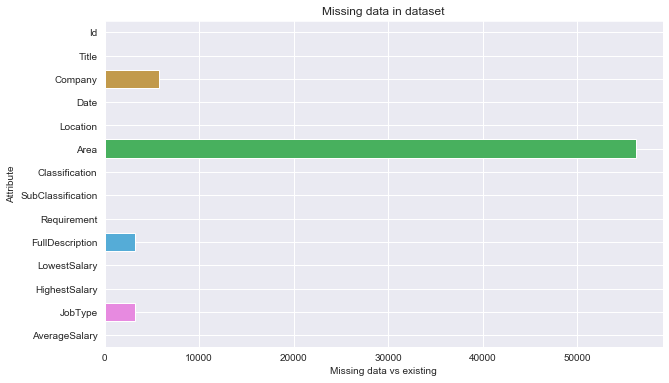

In [25]:
# Analyze missing data

y = data.isnull().sum().index
x = data.isnull().sum()

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 6))
y_pos = np.arange(len(y))

ax = sns.barplot(x,y_pos,data=data,orient = 'h')

ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.set_xlabel('Missing data vs existing')
ax.set_ylabel('Attribute')
ax.set_title('Missing data in dataset')
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)

plt.show()

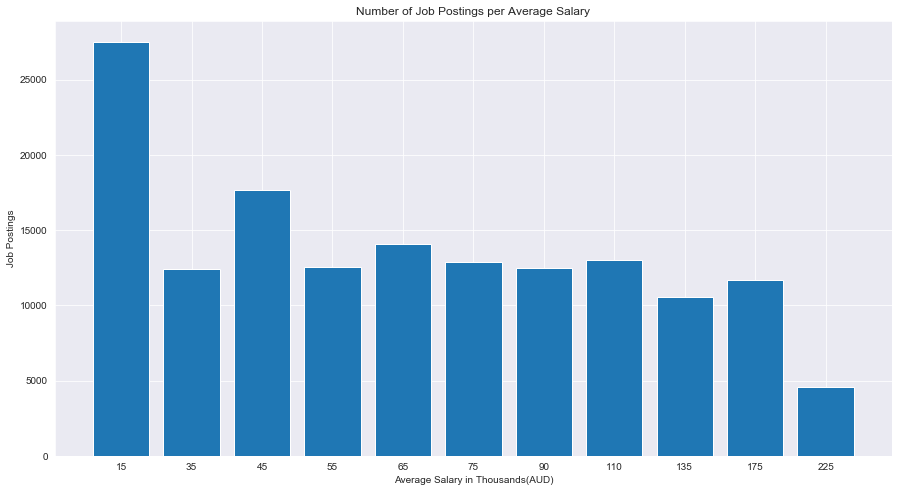

In [26]:
# Number of Job Postings per Average Salary

y = data["AverageSalary"].value_counts().sort_index()
x = data["AverageSalary"].value_counts().sort_index().index
x_pos=np.arange(len(x))

fig, ax = plt.subplots(figsize=(15,8))

plt.bar(x_pos, y)
plt.xticks(x_pos, x)
ax.set_title("Number of Job Postings per Average Salary")
ax.set_xlabel('Average Salary in Thousands(AUD)')
ax.set_ylabel('Job Postings')
plt.show()

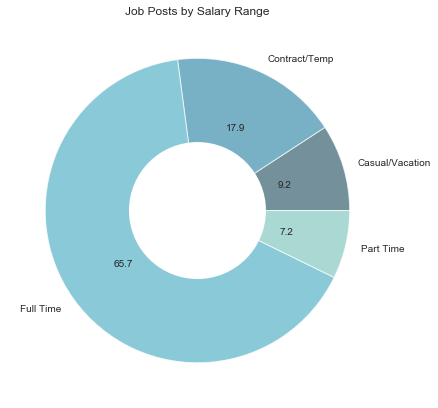

In [27]:
data_type=data[data["JobType"].isna()==False]
data_type=data_type.groupby("JobType").count()
data_type["Label"]=data_type.index
data_type["Count"]=data_type["Id"]

# Salary ranges plot
fig, ax = plt.subplots(figsize=(7,7)) 
ax.pie(data_type['Count'], colors=sns.color_palette("GnBu_d", len(data_type)),labels=data_type['Label'],wedgeprops={'alpha':0.7},autopct='%1.1f')
ax.set_title('Job Posts by Salary Range', loc='center')

# add centre circle to make it a donut
centre_circle2 = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=0)
ax.add_patch(centre_circle2)

In [28]:
# Copy of the dataset filtering "Melbourne" location
melbourne = data[data["Location"]=='Melbourne']
melbourne_classification_count = melbourne.groupby('Classification').agg('count')

In [29]:
# Function to group lower ranking values
def group_lower_ranking_values(column):
    # Group the dataset melbourne by the parameter "column"
    pie_counts = melbourne.groupby(column).agg('count')
    # Create a variable which is filtered by quantile 50
    pct_value = pie_counts[lambda df: df.columns[0]].quantile(.50)
    # Filter values below the variable pct_value
    values_below_pct_value = pie_counts[lambda df: df.columns[0]].loc[lambda s: s < pct_value].index.values
    # Function to change the classification to "Other" where applies
    def fix_values(row):
        if row[column] in values_below_pct_value:
            row[column] = 'Other'
        return row 
    # Apply the fix_value function
    pie_grouped = melbourne.apply(fix_values, axis=1).groupby(column).agg('count')
    return pie_grouped

# Dataset after the function group_lower_ranking_values
melbourne_classification_count = group_lower_ranking_values('Classification')

In [30]:
# The labels of the pie
melbourne_labels = melbourne_classification_count.Id.sort_values().index
# The values of the pie
melbourne_counts = melbourne_classification_count.Id.sort_values()

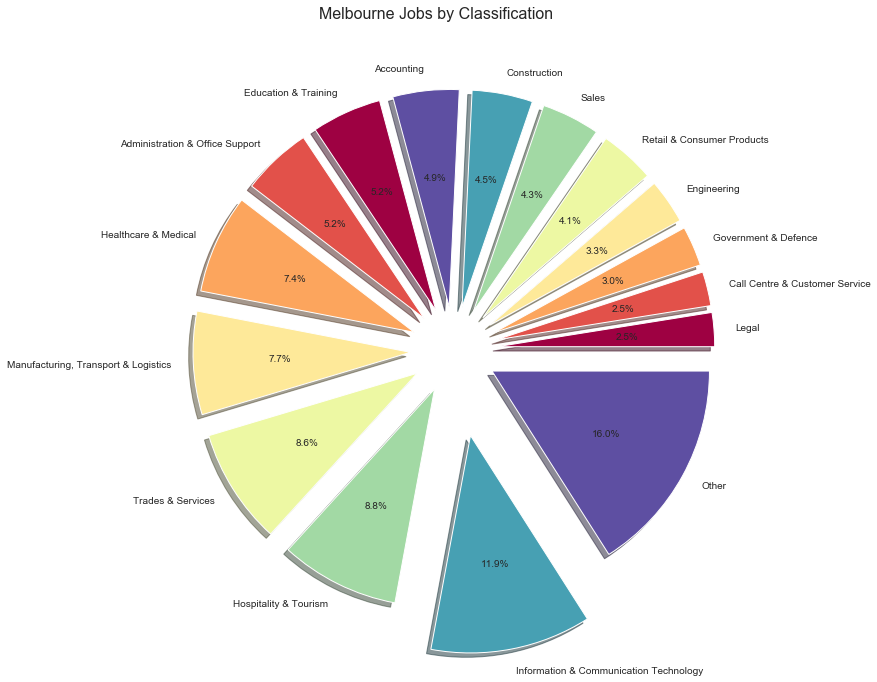

In [31]:
plt.figure(figsize=(20,10))
cmap = plt.get_cmap('Spectral')
# Change color every 8 plot
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
# The distance between the center, the value 0.4 will emphasize the variable "Information & Communication Technology "
explode = (0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.2)
# plot the pie
melbourne_pie = plt.pie(melbourne_counts, explode=explode,labels=melbourne_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.suptitle('Melbourne Jobs by Classification', fontsize=16)
plt.show()

In [32]:
top_cities=data["Location"].value_counts().index[:30]
top_cities_df=data[data["Location"].isin(top_cities)]
top_cities_df

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15
5,37404307,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149994,37709314,Dance Studio Coordinator,Grace Lutheran College,2018-11-13,Brisbane,Northern Suburbs,Education & Training,Management - Schools,Grace has a highly-regarded and active Perform...,<p>Grace has a highly-regarded and active Perf...,0,30,Part Time,15
149995,37709313,Geology Technician,Saracen Gold Mines Pty Ltd,2018-11-13,"Kalgoorlie, Goldfields & Esperance",NaN,"Mining, Resources & Energy",Mining - Exploration & Geoscience,"Due to an increase in our Exploration budget, ...","<p style=""text-align:justify;"">Saracen Mineral...",0,30,Full Time,15
149996,37709312,Lead Product Manager UX/UI,Opus Recruitment Solutions,2018-11-13,Melbourne,CBD & Inner Suburbs,Design & Architecture,Graphic Design,Senior Lead Product Manager | UX/UI | Payment/...,One Australia’s leading online payments platfo...,0,30,Full Time,15
149997,37709253,Junior Primary Teacher,Covenant Christian School (ACT),2018-11-13,ACT,NaN,Education & Training,Teaching - Primary,Junior Primary teacher to take a small single ...,<p><strong>Junior Primary Teacher (part time o...,0,30,Full Time,15


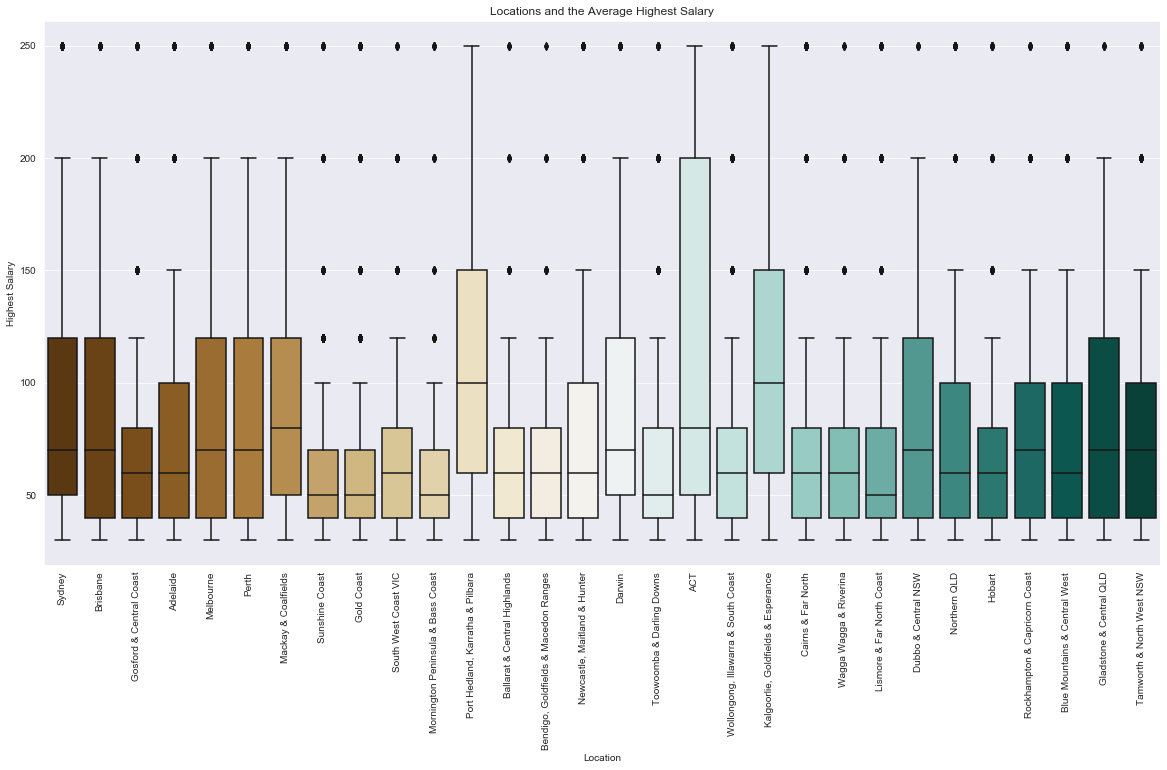

In [33]:
plt.figure(figsize=(20,10))
ax=sns.boxplot(x="Location",y="HighestSalary",data=top_cities_df,palette=sns.color_palette("BrBG", 30))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.title("Locations and the Average Highest Salary")
plt.ylabel("Highest Salary")
plt.show()

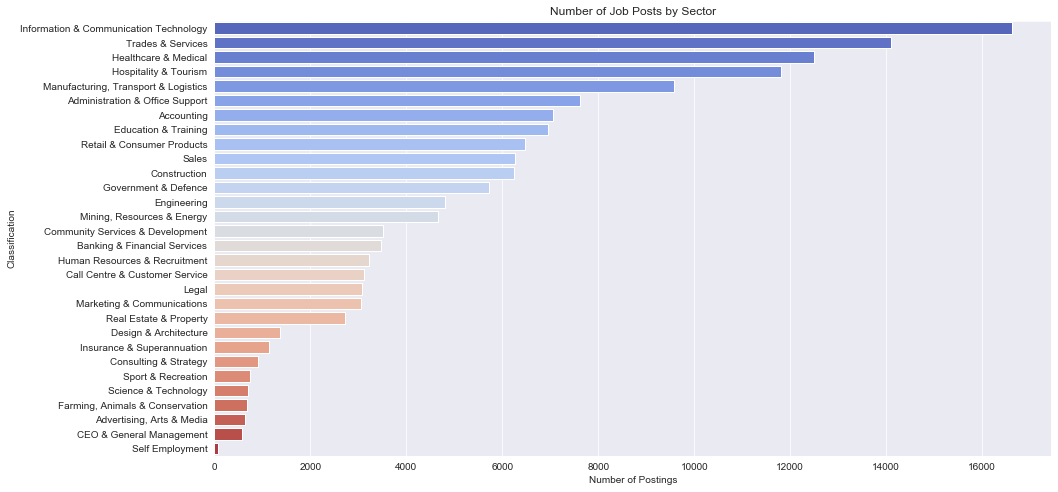

In [34]:
class_count = data['Classification'].value_counts()
plt.figure(figsize=(15,8))
sns.countplot(y="Classification",
              data=data,order=class_count.index,palette=sns.color_palette("coolwarm", len(class_count)))
plt.title('Number of Job Posts by Sector')
plt.xlabel('Number of Postings')
plt.show()

# Assessment 3 - Section 1

## Part 1

### Analyse by comparison

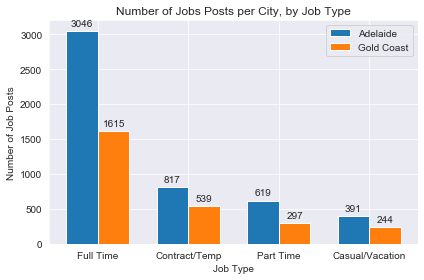

In [35]:
#Which city has more job? How many jobs each type (casual, fulltime, etc.) are there in each city? 

#Extracting the unique values for job types, exclusing NaN values.
labels = data['JobType'].dropna().unique()

#Filtering data only for Adelaide
adelaide = data[data["Location"]=='Adelaide']

#Counting the number of job posts for each job type in Adelaide and putting in a list.
jobtype_a = list(adelaide.groupby('Location')['JobType'].value_counts())

#Filtering data only for Gold Coast
gc = data[data["Location"]=='Gold Coast']

#Counting the number of job posts for each job type in Gold Coast and putting in a list.
jobtype_gc = list(gc.groupby('Location')['JobType'].value_counts())

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, jobtype_a, width, label='Adelaide')
rects2 = ax.bar(x + width/2, jobtype_gc, width, label='Gold Coast')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Job Posts')
ax.set_xlabel('Job Type')
ax.set_title('Number of Jobs Posts per City, by Job Type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def toplabel(rects):
#Inserting a label on the top of each bar
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


toplabel(rects1)
toplabel(rects2)

fig.tight_layout()

plt.show()

In [36]:
#In each city, which are top 5 job sectors? How many jobs are there in each sector?

print("---------- Adelaide ----------")
print()
df_a = adelaide["Classification"].value_counts()[:5]
df_a = df_a.reset_index()
df_a.columns = ['Classification', 'Number of Posts']
print('List of the top 5 sectors in Adelaide with the respective number of posts:')
print()
print(df_a)
print()
print()

print("---------- Gold Coast ----------")
print()
df_gc = gc["Classification"].value_counts()[:5]
df_gc = df_gc.reset_index()
df_gc.columns = ['Classification', 'Number of Posts']
print('List of the top 5 sectors in Gold Coast with the respective number of posts:')
print()
print(df_gc)

---------- Adelaide ----------

List of the top 5 sectors in Adelaide with the respective number of posts:

                           Classification  Number of Posts
0                       Trades & Services              621
1                    Healthcare & Medical              554
2    Manufacturing, Transport & Logistics              420
3                   Hospitality & Tourism              385
4  Information & Communication Technology              378


---------- Gold Coast ----------

List of the top 5 sectors in Gold Coast with the respective number of posts:

                         Classification  Number of Posts
0                 Hospitality & Tourism              467
1                     Trades & Services              363
2                  Healthcare & Medical              339
3            Retail & Consumer Products              179
4  Manufacturing, Transport & Logistics              176


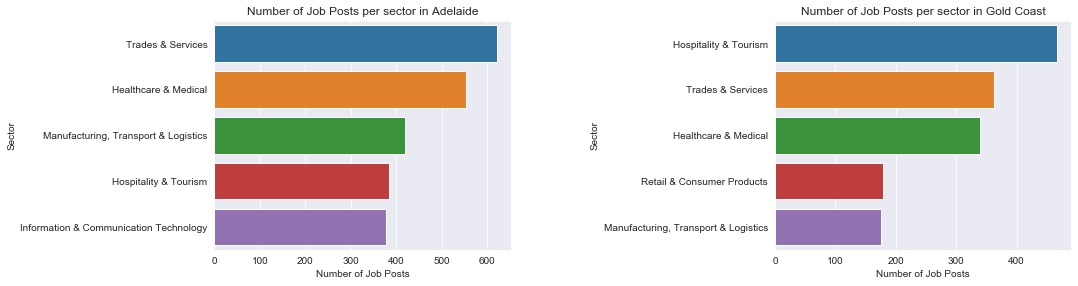

In [37]:
#I think this one is not necessary. I have drawn for myself.
fig, ax = plt.subplots(figsize=(17,6))

plt.subplot(1,2,1)
sns.barplot(x='Number of Posts', y='Classification', data=df_a)
plt.xlabel('Number of Job Posts')
plt.ylabel('Sector')
plt.title('Number of Job Posts per sector in Adelaide')


plt.subplot(1,2,2)
sns.barplot(x='Number of Posts', y='Classification', data=df_gc)
plt.xlabel('Number of Job Posts')
plt.ylabel('Sector')
plt.title('Number of Job Posts per sector in Gold Coast')

plt.tight_layout(8)

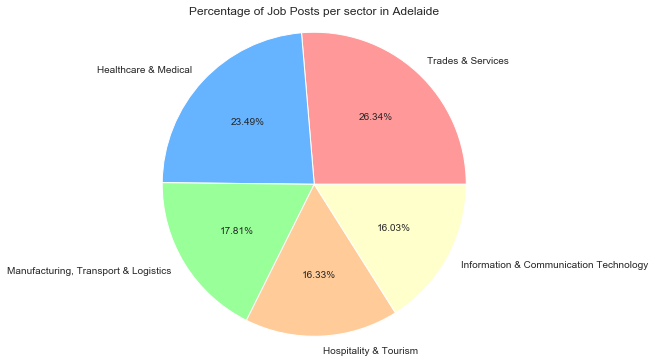

In [38]:
# Visualise the top 5 job sectors in pie chart for each city.

#Visualisation of top 5 jobs sectors for Adelaide
labels = df_a['Classification']
posts = df_a['Number of Posts']
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(posts, labels=labels, colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#ffffcc'], autopct='%.2f%%')
plt.title('Percentage of Job Posts per sector in Adelaide')
ax1.axis('equal')

plt.show()

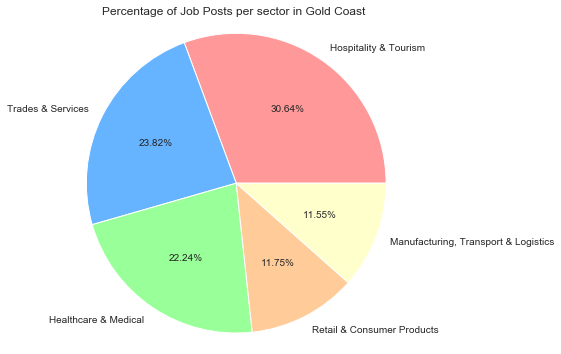

In [39]:
# Visualise the top 5 job sectors in pie chart for each city.

#Visualisation of top 5 jobs sectors for Gold Coast
labels = df_gc['Classification']
posts = df_gc['Number of Posts']
fig2, ax2 = plt.subplots(figsize=(6,6))
ax2.pie(posts, labels=labels, colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#ffffcc'], autopct='%.2f%%')
plt.title('Percentage of Job Posts per sector in Gold Coast')
ax2.axis('equal')

plt.show()

In [40]:
#In each city, list the job salary range with the corresponding number of jobs. Which city is
#more well-paid?

#ADELAIDE
print('---------- Adelaide ----------')
print()
print('Number of Jobs by salary range in Adelaide')
adelaide = data[data["Location"]=='Adelaide']
series_a = adelaide['AverageSalary'].value_counts(bins=6)

#rounding the values for two decimal places
#series_a.round(decimals=2)
print(series_a)
print()
print()

print('---------- Gold Coast ----------')
print()
print('Number of Jobs by salary range in Gold Coast')
gc = data[data["Location"]=='Gold Coast']
series_gc = gc['AverageSalary'].value_counts(bins=6)

#rounding the values for two decimal places
#series_gc.round(decimals=2)
print(series_gc)

---------- Adelaide ----------

Number of Jobs by salary range in Adelaide
(14.789, 50.0]    2175
(50.0, 85.0]      1467
(85.0, 120.0]      788
(155.0, 190.0]     235
(120.0, 155.0]     212
(190.0, 225.0]      94
Name: AverageSalary, dtype: int64


---------- Gold Coast ----------

Number of Jobs by salary range in Gold Coast
(14.789, 50.0]    1524
(50.0, 85.0]       778
(85.0, 120.0]      261
(155.0, 190.0]      80
(120.0, 155.0]      69
(190.0, 225.0]      42
Name: AverageSalary, dtype: int64


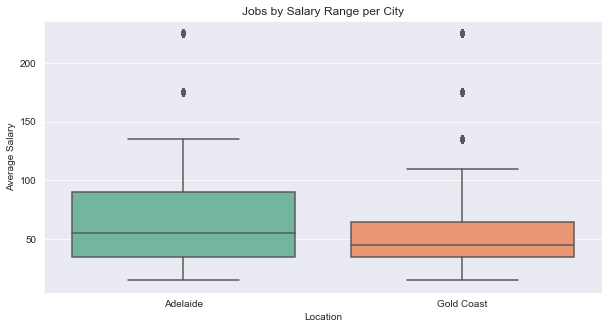

In [41]:
#adelaide = data[data["Location"]=='Adelaide']
#series_a = adelaide['AverageSalary'].value_counts(bins=6)
twocities = data.loc[(data['Location']=='Adelaide') | (data['Location'] == 'Gold Coast'), ['Location', 'AverageSalary']]

plt.figure(figsize=(10,5))
ax=sns.boxplot(x="Location",y="AverageSalary",data=twocities,palette=sns.color_palette("Set2"))
ax.set_xticklabels(ax.get_xticklabels())

plt.title("Jobs by Salary Range per City")
plt.ylabel("Average Salary")
plt.show()

In [42]:
#This is not required. I did it to check if the same company could have more than one classification, which was
#confirmed by looking at Gold Coast Hospital, which has two different classifications: Government & Defence and
#Healthcare & Medical

df = gc.groupby(["Company", "Classification"]).size().reset_index(name="Number of Job Posts")
df.sort_values(["Number of Job Posts"], ascending=False)

,Company,Classification,Number of Job Posts
789,Jora Local,Hospitality & Tourism,134
697,Hays Trades & Labour,Trades & Services,40
605,Gold Coast Hospital & Health Service,Government & Defence,31
1133,RNS Nursing,Healthcare & Medical,26
606,Gold Coast Hospital & Health Service,Healthcare & Medical,24
...,...,...,...
567,G8 Education,Accounting,1
566,G100 Pty Ltd,Administration & Office Support,1
565,G. James Glass and Aluminium,Sales,1
564,Future Assist Accountants,Administration & Office Support,1


In [43]:
#List top 5 companies in each city? Which sectors do they belong to?

print('-------------------ADELAIDE-------------------')
print()

#Filtering data for Adelaide
adelaide = data[data["Location"]=='Adelaide']

top5_a = adelaide['Company'].value_counts()[:5]
print('The top 5 companies in Adelaide are:')
print(top5_a)
print()
print()
print('Each company belongs to different sectors as detailed below.')
print()

list_a = list(top5_a.index)

#using for to iterate over the list of top 5 companies and using the value to filter the posts in the dataframe.
for c in list_a:
    subclass_a = adelaide.loc[(adelaide["Company"]== c), ['Classification']]
    subclass_a = subclass_a['Classification'].unique()
    print('*', c)
    print('This company has {} different classifications, which are:'.format(len(subclass_a)))
    print(subclass_a)
    print()
    
print('------------------GOLD COAST------------------')
print()

#Filtering data for Gold Coast
gc = data[data["Location"]=='Gold Coast']

#Finding the 5 companies with more job posts
top5_gc = gc[('Company')].value_counts()[:5]
print('The top 5 companies in Gold Coast are:')
print(top5_gc)
print()
print()
print('Each company belongs to different sectors as detailed below.')
print()

#Getting the names of the top five companies in Gold Coast and Adelaide and putting in a list
list_gc = list(top5_gc.index)

#using for to iterate over the list of top 5 companies and using the value to filter the posts in the dataframe.
for c in list_gc:
    subclass_gc = gc.loc[(gc["Company"]== c), ['Classification']]
    subclass_gc = subclass_gc['Classification'].unique()
    print('*', c)
    print('This company has {} different classifications, which are:'.format(len(subclass_gc)))
    print(subclass_gc)
    print()
    
  

-------------------ADELAIDE-------------------

The top 5 companies in Adelaide are:
Jora Local               109
S.A. Health               95
Hays Talent Solutions     46
Excel Recruitment         41
Randstad - Industrial     36
Name: Company, dtype: int64


Each company belongs to different sectors as detailed below.

* Jora Local
This company has 3 different classifications, which are:
['Hospitality & Tourism' 'Retail & Consumer Products' 'Trades & Services']

* S.A. Health
This company has 6 different classifications, which are:
['Healthcare & Medical' 'Government & Defence' 'Science & Technology'
 'Administration & Office Support'
 'Information & Communication Technology' 'CEO & General Management']

* Hays Talent Solutions
This company has 8 different classifications, which are:
['Banking & Financial Services' 'Retail & Consumer Products' 'Sales'
 'Call Centre & Customer Service' 'Insurance & Superannuation'
 'Hospitality & Tourism' 'Mining, Resources & Energy' 'Accounting']

* E

### Analyse by time

In [44]:
### Visualize the number of job posts by month

# Add a new column with the Month the job was posted
data['Month']= data['Date'].dt.strftime('%B')

# Add column with the day part of the date only
data['DateDay']= data['Date'].dt.strftime('%d')

In [45]:
# Grouped by Date - count of all rows for each date
MonthGroupBy = data.groupby(['Month']).count() 

# Each Id is a unique job post - so we focus on the Id count
# New dataframe with Id and month as index
MonthGroupBy = pd.DataFrame(MonthGroupBy['Id'])

# Visualize to confirm
MonthGroupBy.head()

,Id
Month,
November,36088
October,113300


In [46]:
# Add new column DayCount to count number of days we have job posts for in each month
MonthGroupBy['DayCount'] = data.groupby('Month')['DateDay'].nunique()
MonthGroupBy.head(15)

,Id,DayCount
Month,,
November,36088,13
October,113300,31


In [47]:
# Calculate the daily average for each month
MonthGroupBy['AverageDailyJobPosts'] = MonthGroupBy['Id'] / MonthGroupBy['DayCount']

In [48]:
# List for correct month order
month_order = ["October", "November"]

# Reindex by our preferred month order
MonthGroupBy = MonthGroupBy.reindex(month_order) 

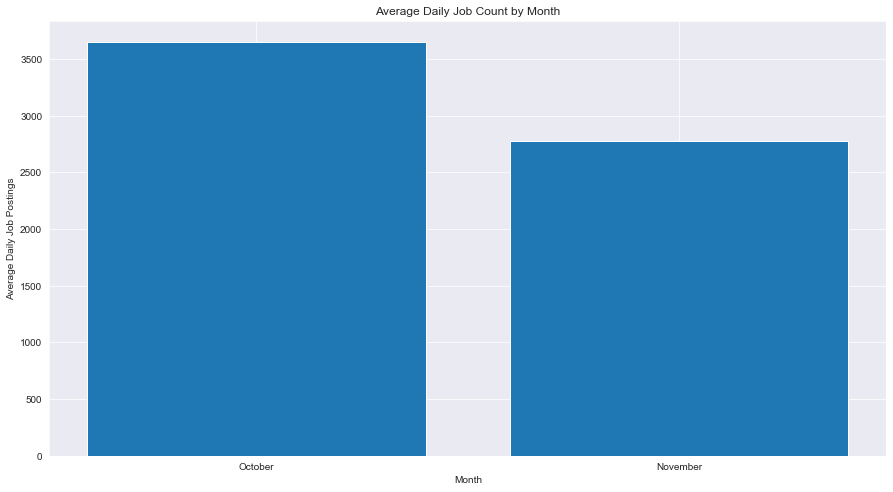

In [49]:
# Average Daily Job Count by Month

# y axis
y = MonthGroupBy['AverageDailyJobPosts']

# x axis 
x = MonthGroupBy["Id"].index

fig, ax = plt.subplots(figsize=(15,8))

plt.bar(x, y)
ax.set_title("Average Daily Job Count by Month")
ax.set_xlabel('Month')
ax.set_ylabel('Average Daily Job Postings')
plt.show()

In [50]:
### Average Daily Job Count by Day of the Week

# Create a column for the Day of the Week based off the date
data['DayofWeek'] = data['Date'].dt.day_name()

In [51]:
# A list with our preferred day of the week order
dayofweek_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Group job posts by day of the week count and order correctly(Mon-Sun) with DayofWeek as ordered index
dayofweek_count = data.groupby(data['DayofWeek']).count().reindex(dayofweek_order) 
dayofweek_count 

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Month,DateDay,DayofWeek
DayofWeek,,,,,,,,,,,,,,,,,
Monday,30110,30110,29143,30110,30110,19139,30110,30110,30110,29525,30110,30110,29526,30110,30110,30110,30110
Tuesday,28093,28093,27007,28093,28093,17210,28093,28093,28093,27542,28093,28093,27560,28093,28093,28093,28093
Wednesday,42597,42597,41028,42597,42597,26607,42597,42597,42597,41816,42597,42597,41821,42597,42597,42597,42597
Thursday,21465,21465,20774,21465,21465,12981,21465,21465,21465,20840,21465,21465,20846,21465,21465,21465,21465
Friday,20880,20880,20100,20880,20880,13152,20880,20880,20880,20447,20880,20880,20466,20880,20880,20880,20880
Saturday,2559,2559,2343,2559,2559,1683,2559,2559,2559,2517,2559,2559,2517,2559,2559,2559,2559
Sunday,3684,3684,3233,3684,3684,2384,3684,3684,3684,3437,3684,3684,3437,3684,3684,3684,3684


In [52]:
# Job posts = unique Id count
# New dataframe with Id and day of week as index
DayOfWeekGroupBy = pd.DataFrame(dayofweek_count['Id'])
DayOfWeekGroupBy

,Id
DayofWeek,
Monday,30110
Tuesday,28093
Wednesday,42597
Thursday,21465
Friday,20880
Saturday,2559
Sunday,3684


In [53]:
# New column for count how many unique dates per day of week
# Groupby DayofWeek and count unique Dates aka unique dates per DayofWeek
DayOfWeekGroupBy['DayofWeekCount'] = data.groupby('DayofWeek')['Date'].nunique()
DayOfWeekGroupBy.head(15)

,Id,DayofWeekCount
DayofWeek,,
Monday,30110,7
Tuesday,28093,7
Wednesday,42597,6
Thursday,21465,6
Friday,20880,6
Saturday,2559,6
Sunday,3684,6


In [54]:
DayOfWeekGroupBy['AverageDailyJobPosts'] = DayOfWeekGroupBy['Id'] / DayOfWeekGroupBy['DayofWeekCount']
DayOfWeekGroupBy

,Id,DayofWeekCount,AverageDailyJobPosts
DayofWeek,,,
Monday,30110,7,4301.428571
Tuesday,28093,7,4013.285714
Wednesday,42597,6,7099.500000
Thursday,21465,6,3577.500000
Friday,20880,6,3480.000000
Saturday,2559,6,426.500000
Sunday,3684,6,614.000000


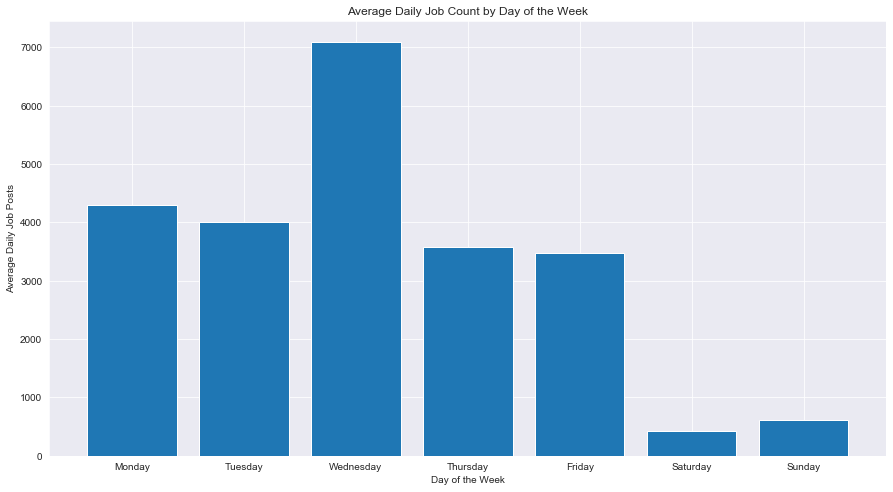

In [55]:
# Average Daily Job Count by Day of the Week
# y axis 
y = DayOfWeekGroupBy['AverageDailyJobPosts']

# x axis is Day of the Week(our index that has been ordered Mon - Sun)
x = DayOfWeekGroupBy['Id'].index

fig, ax = plt.subplots(figsize=(15,8))

ax.set_title("Average Daily Job Count by Day of the Week")
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Average Daily Job Posts')

plt.bar(x, y)
plt.show()

In [56]:
### Visualize the number of job posts by day of the month

# Grouped by Date - count of all rows for each date
DateDayGroupBy = data.groupby(['DateDay']).count() 

# Each Id is a unique job post - so we focus on the Id count
# New dataframe with Id column and date as index
DateDayGroupBy = pd.DataFrame(DateDayGroupBy['Id'])

# Visualize to confirm
DateDayGroupBy.head()

,Id
DateDay,
01,2332
02,4826
03,5433
04,9088
05,13447


In [57]:
# New column to count how many unique months for each day date
# e.g for the 1st we have 2 month entries, but for 14th we only have 1 - we will use this to calculate daily average
DateDayGroupBy['MonthCount'] = data.groupby('DateDay')['Month'].nunique()
DateDayGroupBy.head(15)

,Id,MonthCount
DateDay,,
01,2332,2
02,4826,2
03,5433,2
04,9088,2
05,13447,2
06,4110,2
07,7961,2
08,6171,2
09,9658,2


In [58]:
# Calculate the daily average for each Day Date
DateDayGroupBy['AverageDailyJobPosts'] = DateDayGroupBy['Id'] / DateDayGroupBy['MonthCount']

In [59]:
DateDayGroupBy.head(20)

,Id,MonthCount,AverageDailyJobPosts
DateDay,,,
01,2332,2,1166.0
02,4826,2,2413.0
03,5433,2,2716.5
04,9088,2,4544.0
05,13447,2,6723.5
06,4110,2,2055.0
07,7961,2,3980.5
08,6171,2,3085.5
09,9658,2,4829.0


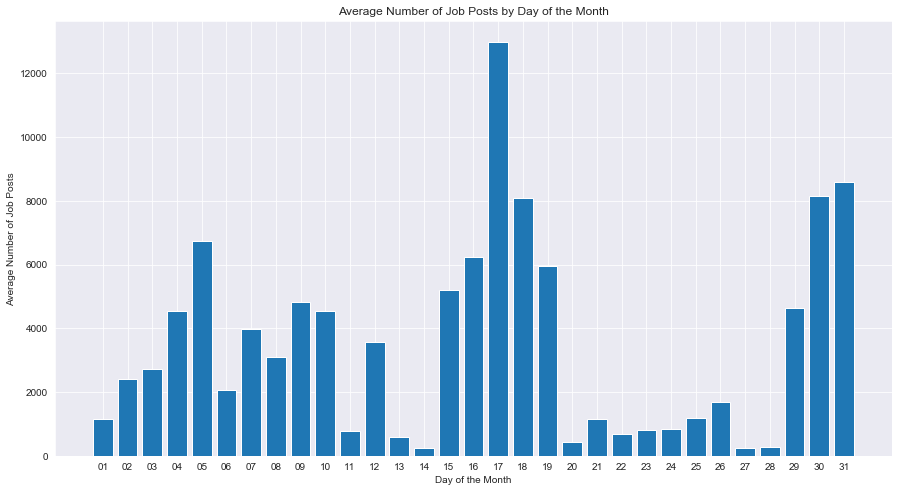

In [60]:
# Average Daily Job Count by Day of Month

# y axis 
y = DateDayGroupBy['AverageDailyJobPosts']

# x axis is Day of the Month
x = DateDayGroupBy["Id"].sort_index(ascending=True).index

fig, ax = plt.subplots(figsize=(15,8))

plt.bar(x, y)
ax.set_title("Average Number of Job Posts by Day of the Month")
ax.set_xlabel('Day of the Month')
ax.set_ylabel('Average Number of Job Posts')
plt.show()

In [61]:
### Visualize trending of the job postings for the big cities

#calculate the top 5 locations with more job posts
top5_cities=list(data["Location"].value_counts().index[:5])
#create a data only with the top 5 cities
top5_cities_df=data[data["Location"].isin(top5_cities)]
top5_cities_df.head(20)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Month,DateDay,DayofWeek
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15,October,07,Sunday
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15,October,07,Sunday
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15,October,07,Sunday
5,37404307,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15,October,07,Sunday
6,37404355,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,NaN,0,30,NaN,15,October,07,Sunday
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN,15,October,07,Sunday
8,37404301,Telemarketer,Reventon Investments,2018-10-07,Melbourne,CBD & Inner Suburbs,Call Centre & Customer Service,Sales - Outbound,Market leading investment & financial services...,NaN,0,30,NaN,15,October,07,Sunday
9,37404286,Casual Dish Hand in Brighton,Jora Local,2018-10-07,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Kitchen & Sandwich Hands,A restaurant in Brighton is seeking a casual D...,NaN,0,30,NaN,15,October,07,Sunday
10,37404333,Sales and Service Banking Consultant,Hays Talent Solutions,2018-10-07,Adelaide,NaN,Banking & Financial Services,Banking - Retail/Branch,We currently have an exciting part-time opport...,NaN,0,30,NaN,15,October,07,Sunday
11,37404235,Customer Service Client Nurturer,NaN,2018-10-07,Melbourne,CBD & Inner Suburbs,Call Centre & Customer Service,Customer Service - Customer Facing,"Immediate start - We love our clients, it's yo...",NaN,0,30,NaN,15,October,07,Sunday


In [62]:
#group the top 5 cities by date and location and count each job post
#for this exercise only 1 column will be required, Id was selected because all job posts has values in this column
#reset_index in order to eliminate the filter of date and location made by groupby
top5_cities_count=top5_cities_df.groupby(["Date","Location"]).count()["Id"].reset_index()

#create a dataset for each city 
city1=top5_cities_count[top5_cities_count["Location"]==top5_cities[0]]
city2=top5_cities_count[top5_cities_count["Location"]==top5_cities[1]]
city3=top5_cities_count[top5_cities_count["Location"]==top5_cities[2]]
city4=top5_cities_count[top5_cities_count["Location"]==top5_cities[3]]
city5=top5_cities_count[top5_cities_count["Location"]==top5_cities[4]]

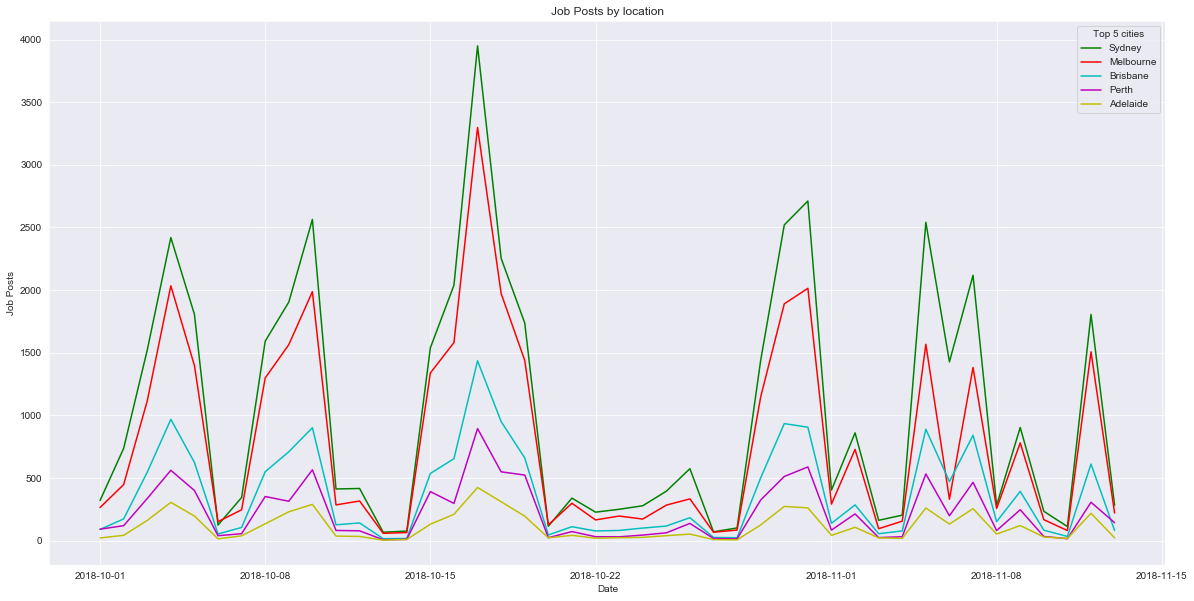

In [63]:
#plot each city in the same figure
plt.figure(figsize=(20,10))
gcit1=plt.plot(city1['Date'], city1['Id'],color="g")
gcit2=plt.plot(city2['Date'], city2['Id'],color="r")
gcit3=plt.plot(city3['Date'], city3['Id'],color="c")
gcit4=plt.plot(city4['Date'], city4['Id'],color="m")
gcit5=plt.plot(city5['Date'], city5['Id'],color="y")

plt.title("Job Posts by location")
plt.xlabel("Date")
plt.ylabel("Job Posts")
plt.legend([top5_cities[0],top5_cities[1],top5_cities[2],top5_cities[3],top5_cities[4]],title="Top 5 cities")
plt.show()

### Forecasting and skill extractions

In [64]:
'''Using moving average for 7 days and 30 days to predict the number of job postings 
and visualise them in line chart. Which one creates a better prediction?'''

#create a new data set with the count of each job post per day
jobs_fsct=data.groupby("Date").count()["Id"].reset_index()
jobs_fsct.head()

,Date,Id
0,2018-10-01,1017
1,2018-10-02,1965
2,2018-10-03,4935
3,2018-10-04,8455
4,2018-10-05,5697


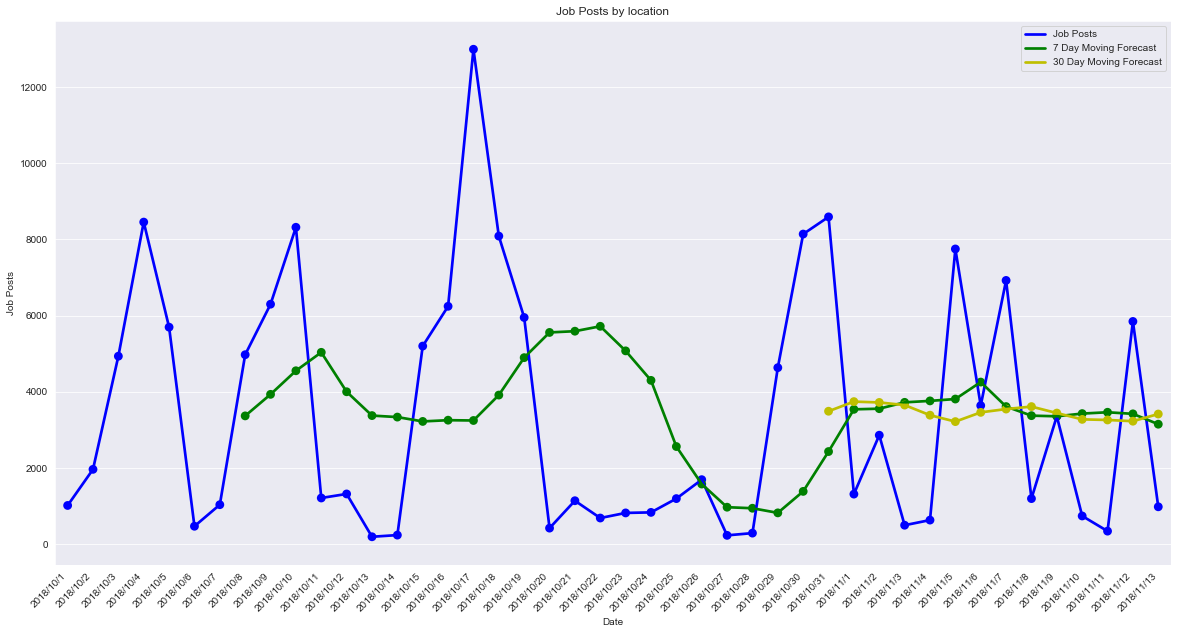

In [65]:
from datetime import date, timedelta
import calendar
import matplotlib.dates as mdates

#define the functions for the moving average method
def moving_average(df,k,from_date,to_date,col_x,col_y):
    copy_df=df.copy()
    ma_df=pd.DataFrame(columns=[col_x,col_y])
    num_df=len(df)
    dif_d = to_date - from_date
    for m in range(dif_d.days+1):
        if m<k:
            predict=float("nan")
        else:
            history=copy_df[col_y][m-k:m]
            predict=history.mean()
        ma_df.loc[m]=['{dt.year}/{dt.month}/{dt.day}'.format(dt = from_date+timedelta(days=m)), predict]
        
        if m>=num_df:
            copy_df.loc[m]= ['{dt.year}/{dt.month}/{dt.day}'.format(dt = from_date+timedelta(days=m)), predict]
        
    return ma_df

#define the start date value
sdate = min(jobs_fsct["Date"])
#define the end date value -> max date
edate = max(jobs_fsct["Date"])+timedelta(days=0)

f, ax = plt.subplots(1, 1, figsize=(20,10))

#calculate the moving average with 7 days
fsct_7d=moving_average(jobs_fsct,7,sdate,edate,"Date","Id")
#calculate the moving average with 30 days
fsct_30d=moving_average(jobs_fsct,30,sdate,edate,"Date","Id")
#plot the original data, moving average 7 days, and moving average 30 days
sns.pointplot(x='Date', y='Id', data=jobs_fsct, color='b',ax=ax)
sns.pointplot(x='Date', y='Id', data=fsct_7d, color='g',linestyle=[":"],ax=ax)
sns.pointplot(x='Date', y='Id', data=fsct_30d, color='y',linestyle=["--"],ax=ax)
plt.title("Job Posts by location")
plt.xlabel("Date")
plt.ylabel("Job Posts")
ax.legend(handles=ax.lines[::len(jobs_fsct)+1], labels=["Job Posts", "7 Day Moving Forecast", "30 Day Moving Forecast"])
plt.xticks(rotation=45,  horizontalalignment='right')

plt.show()

In [66]:
###Choose your favourite job sector/sub-sector, then use TF/IDF to extract important keywords. Visualise them in word cloud chart


#Filter the dataset by the chosen classification: ICT
jobs_ict=data[data["Classification"]=="Information & Communication Technology"]
#apply textual data analytics to the column title
jobs_ict=[x.strip() for x in jobs_ict["Title"]] 
jobs_ict[:5]

['Technical Support Engineer',
 'Business Development Manager',
 'Systems Engineer',
 'Operations Delivery Manager',
 'Technical Support Executive - $70K + Super - CBD  - Funky offices']

In [67]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

#define the sklearn method to do the analysis
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = 'english', max_features=500)

#fit the model with the title column text 
features = tfidf.fit(jobs_ict)
corpus_tf_idf = tfidf.transform(jobs_ict) 

sum_words = corpus_tf_idf.sum(axis=0)
#calculate the word frequency in the column
words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
#sort the word frequency 
words_ord=sorted(words_freq , key = lambda x: x[1], reverse=True)
print(words_ord[:50])


[('developer', 1134.8360443161055), ('analyst', 1129.7213311091562), ('senior', 954.4872333704959), ('manager', 925.2763799167309), ('engineer', 921.000321958471), ('business', 875.357562219217), ('project', 646.5124128730716), ('architect', 513.9917374026877), ('support', 453.2246732000931), ('data', 435.96397828678914), ('consultant', 427.8391721891129), ('software', 409.47523868793604), ('technical', 404.1166426539953), ('lead', 400.16740798050984), ('systems', 366.83120636050796), ('security', 337.17964227325604), ('specialist', 316.1285753419638), ('net', 306.988061553183), ('network', 300.75231344703445), ('java', 263.55563123682657), ('solution', 255.30452807220237), ('test', 254.18413353051739), ('administrator', 246.30829919222975), ('officer', 230.26696182147143), ('service', 229.0299184062986), ('stack', 227.75444611364097), ('contract', 223.8517493074136), ('end', 223.80906793099803), ('infrastructure', 216.7227367734845), ('cloud', 194.15500376187163), ('change', 178.38471

In [68]:
#print the 40 most relevant words in the title column for ICT classification
#use this list in https://wordart.com/create
for i in words_ord[:40]:
    print(i[0])

developer
analyst
senior
manager
engineer
business
project
architect
support
data
consultant
software
technical
lead
systems
security
specialist
net
network
java
solution
test
administrator
officer
service
stack
contract
end
infrastructure
cloud
change
devops
digital
sap
level
delivery
solutions
application
product
desk


## Section 2

### Scenario 1

In [69]:
#define the list of Queensland cities in the dataset
qld_cities=['Brisbane', 'Mackay & Coalfields','Sunshine Coast', 'Gold Coast','Hervey Bay & Fraser Coast','Toowoomba & Darling Downs'
'Cairns & Far North','Northern QLD','Rockhampton & Capricorn Coast','Gladstone & Central QLD','Somerset & Lockyer', 
'Western QLD','Bundaberg & Wide Bay Burnett']
data["Location"].unique()

array(['Sydney', 'Richmond & Hawkesbury', 'Brisbane',
       'Gosford & Central Coast', 'Adelaide', 'Melbourne', 'Perth',
       'Mackay & Coalfields', 'Sunshine Coast', 'Gold Coast',
       'West Gippsland & Latrobe Valley', 'Hervey Bay & Fraser Coast',
       'South West Coast VIC', 'Mornington Peninsula & Bass Coast',
       'Port Hedland, Karratha & Pilbara', 'Ballarat & Central Highlands',
       'Bendigo, Goldfields & Macedon Ranges',
       'Yarra Valley & High Country', 'Coffs Harbour & North Coast',
       'Newcastle, Maitland & Hunter', 'Tumut, Snowy & Monaro', 'Darwin',
       'Toowoomba & Darling Downs', 'ACT',
       'Wollongong, Illawarra & South Coast',
       'Port Macquarie & Mid North Coast',
       'Southern Highlands & Tablelands', 'Albury Area',
       'Yorke Peninsula & Clare Valley',
       'Kalgoorlie, Goldfields & Esperance',
       'Far West & North Central NSW', 'Cairns & Far North',
       'Wagga Wagga & Riverina', 'Lismore & Far North Coast',
       'Alice 

In [70]:
#filter the dataset by Queensland cities
jobs_qld=data[data["Location"].isin(qld_cities)]
jobs_qld.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Month,DateDay,DayofWeek
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15,October,07,Sunday
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN,15,October,07,Sunday
13,37404335,BPV_Utility All Rounders_Casual,ISS Facility Services,2018-10-07,Mackay & Coalfields,NaN,Hospitality & Tourism,Housekeeping,An exciting opportunity exists for Casual DIDO...,NaN,0,30,NaN,15,October,07,Sunday
15,37404259,Customer Service Officer,NaN,2018-10-07,Sunshine Coast,NaN,Call Centre & Customer Service,Customer Service - Call Centre,An opportunity for a customer service-focused ...,NaN,0,30,NaN,15,October,07,Sunday
21,37404239,Casual Barista in Murarrie,Jora Local,2018-10-07,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Bar & Beverage Staff,A cafe in Murarrie is seeking a casual Barista...,NaN,0,30,NaN,15,October,07,Sunday


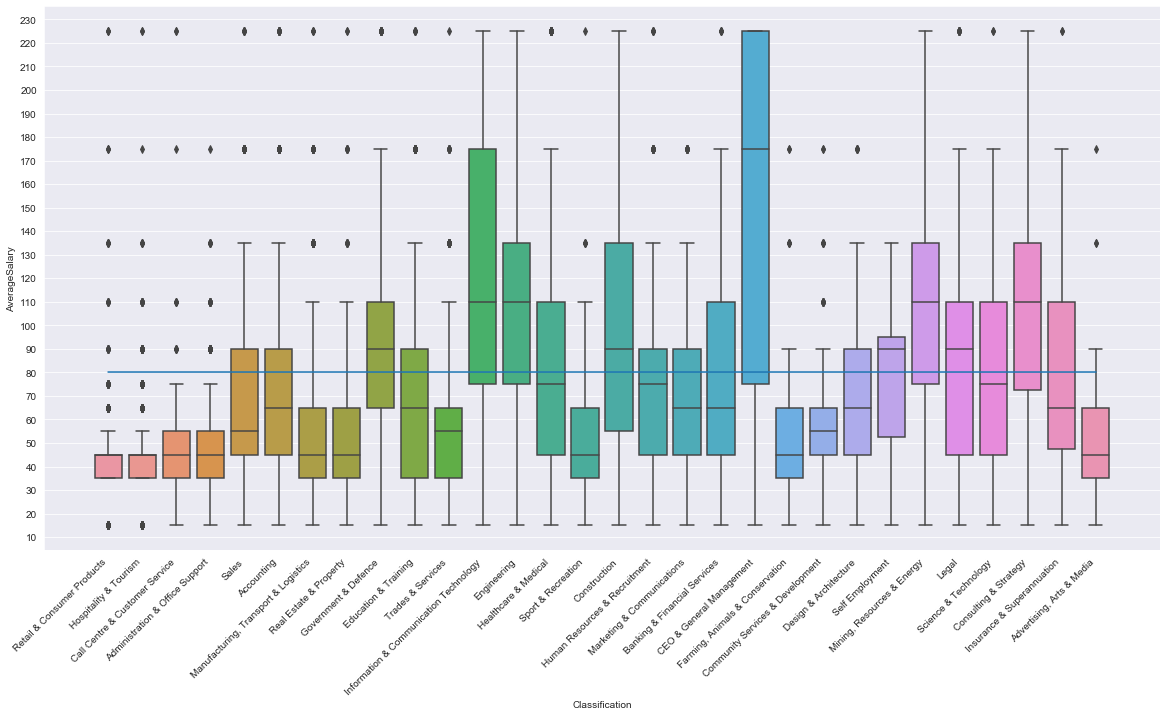

In [71]:
import matplotlib.ticker as ticker

f, ax = plt.subplots(1, 1, figsize=(20,10))
#visualise the boxplot of average salary vs classification
sns.boxplot(x="Classification",y="AverageSalary",data=jobs_qld,ax=ax)
#draw a line in 80k average salary
sns.lineplot(jobs_qld["Classification"],80,ax=ax)
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

plt.xticks(rotation=45,  horizontalalignment='right')

plt.show()

In [72]:
#method 1

#group Queensland jobs by classification
jobs_qld_median=jobs_qld.groupby("Classification").median()
#filter average salary medians above 80k
jobs_qld_median[jobs_qld_median["AverageSalary"]>=80]

,Id,LowestSalary,HighestSalary,AverageSalary
Classification,,,,
CEO & General Management,37496254.5,150.0,200.0,175.0
Construction,37504893.5,80.0,100.0,90.0
Consulting & Strategy,37493545.0,100.0,120.0,110.0
Engineering,37503973.5,100.0,120.0,110.0
Government & Defence,37507503.0,80.0,100.0,90.0
Information & Communication Technology,37511331.0,100.0,120.0,110.0
Legal,37509656.0,80.0,100.0,90.0
"Mining, Resources & Energy",37501520.0,100.0,120.0,110.0
Self Employment,37553242.5,80.0,100.0,90.0


In [73]:
#method 2 (most likely)

#group Queensland jobs by SubClassification
jobs_qld_sub_median=jobs_qld.groupby("SubClassification").agg({'AverageSalary': lambda x:x.quantile(0.25),
                                                              "Id":len})
#filter the Average Salary Q25 above 80k
lst_80k=list(jobs_qld_sub_median[(jobs_qld_sub_median["AverageSalary"]>=80) & (jobs_qld_sub_median["Id"]>=5)].index)
print(lst_80k)
df_80k=jobs_qld[jobs_qld["SubClassification"].isin(lst_80k)]

['Aerospace Engineering', 'Architects', 'Banking - Business', 'Business/Systems Analysts', 'CEO', 'Construction Law', 'Consultants', 'Database Development & Administration', 'Environment & Planning Law', 'Financial Managers & Controllers', 'General Practitioners', 'Generalists - In-house', 'Industrial Relations & Employment Law', 'Intellectual Property Law', 'Management & Change Consulting', 'Management - Schools', 'Management - Universities', 'Market Research & Analysis', 'Mathematics, Statistics & Information Sciences', 'Medical Specialists', 'Mining - Operations', 'Mining - Processing', 'Nursing - Educators & Facilitators', 'Nursing - Paediatric & PICU', 'Organisational Development', 'Policy, Planning & Regulation', 'Process Engineering', 'Programme & Project Management', 'Project Engineering', 'Project Management', 'Residents & Registrars', 'Systems Engineering', 'Teaching - Tertiary', 'Team Leaders', 'Testing & Quality Assurance']


In [74]:
df_80k.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Month,DateDay,DayofWeek
223,37404139,General Practitioner - DWS position; lifestyle...,Ensure Health,2018-10-07,Brisbane,Bayside & Eastern Suburbs,Healthcare & Medical,General Practitioners,"Looking for a high income, DWS position? Inter...",<div><strong>Benefits:</strong></div>\n ...,0,30,Full Time,15,October,07,Sunday
246,37404111,Project Manager (Brisbane),RCP,2018-10-07,Brisbane,CBD & Inner Suburbs,Construction,Project Management,"** Brisbane CBD offices; dynamic, independent ...",<p>RCP is one of Australia's most respected pr...,0,30,Full Time,15,October,07,Sunday
718,37403566,MS BI EXPERT / POWER BI & AZURE CONSULTANT,Ethos BeathChapman,2018-10-07,Brisbane,NaN,Information & Communication Technology,Consultants,Immediate start for a high calibre MS BI EXPER...,"<p style=""text-align:center;""><strong>MS BI EX...",0,30,Full Time,15,October,07,Sunday
881,37403388,General Practionier,NaN,2018-10-07,Brisbane,Northern Suburbs,Healthcare & Medical,General Practitioners,We are seeking GPs for a enwly expanded privat...,<p><strong>General Practitioner</strong><br><b...,0,30,Full Time,15,October,07,Sunday
1178,37403043,Group Financial Controller,TactiCall Recruitment Services,2018-10-06,Brisbane,Southern Suburbs & Logan,Accounting,Financial Managers & Controllers,Multi-faceted role with many key internal and ...,"Our client, is a leader in wholesale and distr...",0,30,Full Time,15,October,06,Saturday


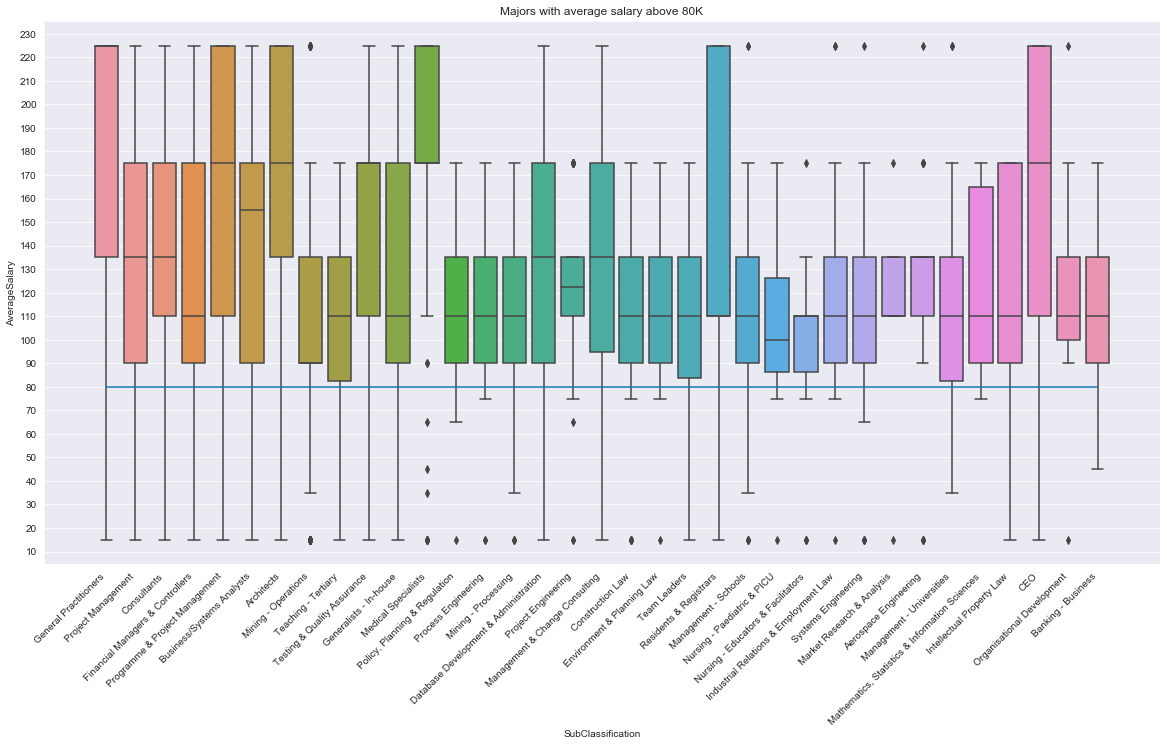

In [75]:
f, ax = plt.subplots(1, 1, figsize=(20,10))
#visualise the boxplot of average salary vs classification
sns.boxplot(x="SubClassification",y="AverageSalary",data=df_80k,ax=ax)
#draw a line in 80k average salary
sns.lineplot(df_80k["SubClassification"],80,ax=ax)
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

plt.title("Majors with average salary above 80K")
plt.xticks(rotation=45,  horizontalalignment='right')

plt.show()

In [76]:
temp=jobs_qld_sub_median[(jobs_qld_sub_median["AverageSalary"]>=80) & (jobs_qld_sub_median["Id"]>=5)]
temp["Id"].sort_values(ascending=False)

SubClassification
Mining - Operations                               303
Programme & Project Management                    279
Business/Systems Analysts                         268
General Practitioners                             241
Project Management                                239
Architects                                        170
Medical Specialists                               120
Testing & Quality Assurance                       109
Consultants                                        93
Financial Managers & Controllers                   60
Database Development & Administration              54
Project Engineering                                50
Teaching - Tertiary                                43
Construction Law                                   39
Management - Schools                               38
Generalists - In-house                             37
Systems Engineering                                36
Management & Change Consulting                     34
Mining - P

In [77]:
print(list(df_80k.groupby("Classification").count().index))

['Accounting', 'Banking & Financial Services', 'CEO & General Management', 'Construction', 'Consulting & Strategy', 'Education & Training', 'Engineering', 'Government & Defence', 'Healthcare & Medical', 'Human Resources & Recruitment', 'Information & Communication Technology', 'Legal', 'Marketing & Communications', 'Mining, Resources & Energy', 'Science & Technology']


In [78]:
df_80k.groupby("Classification").count()["Id"].sort_values(ascending=False)

Classification
Information & Communication Technology    993
Healthcare & Medical                      408
Mining, Resources & Energy                336
Engineering                               188
Construction                              179
Legal                                     125
Education & Training                      104
Accounting                                 60
Consulting & Strategy                      34
Government & Defence                       23
CEO & General Management                   16
Banking & Financial Services               15
Science & Technology                       14
Human Resources & Recruitment              11
Marketing & Communications                  5
Name: Id, dtype: int64

### Scenario 2

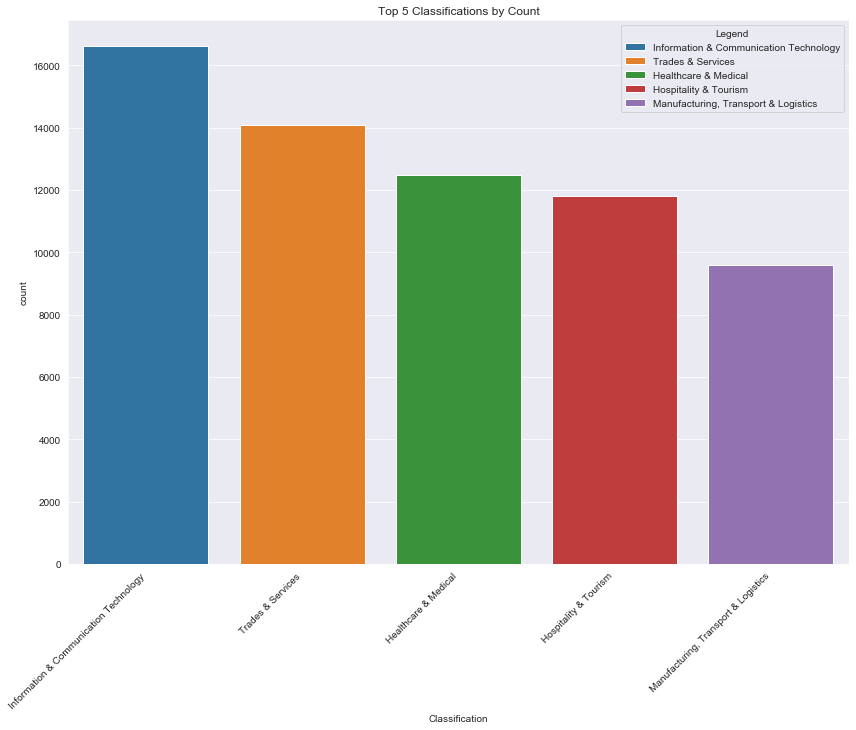

In [79]:
# Visualize Top 5 Classifications by job post count
# Possibly majors that should have increased admission 

plt.figure(figsize=(14,10))
chart = sns.countplot(x="Classification",
                      hue="Classification",
                      data=data,
                      order=data["Classification"].value_counts().iloc[:5].index,
                      dodge=False,
                      hue_order=data["Classification"].value_counts().iloc[:5].index,
                      )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Top 5 Classifications by Count')
plt.xlabel('Classification')

plt.legend(title='Legend', loc='upper right')
plt.show()

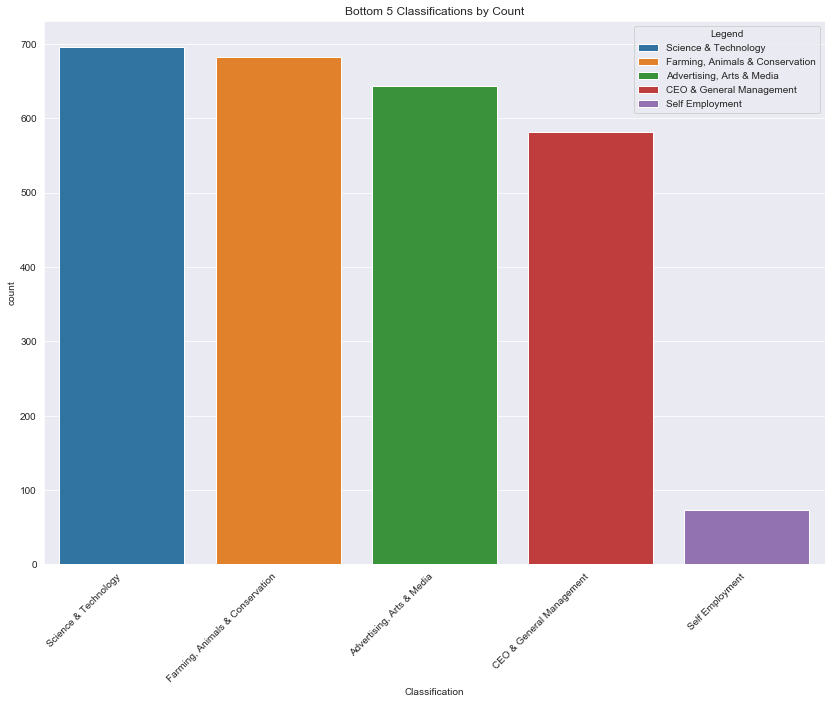

In [80]:
# Visualize Bottom 5 Classifications by job post count
# Possibly majors that should have reduced admission 

plt.figure(figsize=(14,10))
chart = sns.countplot(x="Classification",
                      hue="Classification",
                      data=data,
                      order=data["Classification"].value_counts().iloc[-5:].index,
                      dodge=False,
                      hue_order=data["Classification"].value_counts().iloc[-5:].index,
                      )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Bottom 5 Classifications by Count')
plt.xlabel('Classification')

plt.legend(title='Legend', loc='upper right')
plt.show()

In [81]:
data["JobType"].unique()

array([nan, 'Full Time', 'Contract/Temp', 'Part Time', 'Casual/Vacation'],
      dtype=object)

In [82]:
data["JobType"].value_counts()

Full Time          95989
Contract/Temp      26142
Casual/Vacation    13454
Part Time          10588
Name: JobType, dtype: int64

In [83]:
# Classification with Job Type count sorted by Full Time
ClassificationJobType = data.pivot_table(values='Id', index='Classification', columns='JobType', aggfunc=pd.Series.nunique)
ClassificationJobType['Total'] = ClassificationJobType.sum(axis=1) 
ClassificationJobType.sort_values(['Full Time'],ascending=False)

JobType,Casual/Vacation,Contract/Temp,Full Time,Part Time,Total
Classification,,,,,
Trades & Services,1567.0,2402.0,9459.0,445.0,13873.0
Information & Communication Technology,55.0,7149.0,8774.0,63.0,16041.0
Healthcare & Medical,1476.0,1534.0,7042.0,2326.0,12378.0
"Manufacturing, Transport & Logistics",1349.0,2158.0,5708.0,173.0,9388.0
Sales,123.0,176.0,5693.0,197.0,6189.0
Construction,230.0,787.0,5128.0,24.0,6169.0
Accounting,44.0,1438.0,5085.0,342.0,6909.0
Hospitality & Tourism,4034.0,463.0,4945.0,2101.0,11543.0
Administration & Office Support,261.0,1644.0,4748.0,708.0,7361.0


In [84]:
#We are going to only look for only "full time" and "contract / temporary" jobs to analyse employability
employability=data[data["JobType"].isin(list(('Full Time','Contract/Temp')))]

# We could also look at the full dataset
#employability=data

In [85]:
#the employability dataframe will be group by "SubClassification" and calculate the quantile 25, quantile 75, count of job posts
employ_df=employability.groupby("SubClassification").agg({'AverageSalary': [lambda x:x.quantile(0.25) , 
                                                                            lambda x:x.quantile(0.75) ],
                                                                            "Id":len})
#change the name of the columns of the new df
employ_df.columns=["Quantile_25","Quantile_75","Count"]
#drop the job posts below 6
employ_df=employ_df[employ_df["Count"]>6]

employ_df

,Quantile_25,Quantile_75,Count
SubClassification,,,
Account & Relationship Management,55.0,110.0,1433
Accounts Officers/Clerks,35.0,65.0,593
Accounts Payable,45.0,65.0,368
Accounts Receivable/Credit Control,45.0,65.0,429
Actuarial,75.0,135.0,38
...,...,...,...
Web Development & Production,65.0,135.0,338
Welders & Boilermakers,35.0,75.0,767
Winery & Viticulture,15.0,70.0,15


In [86]:
# Sort by job count - get bottom 50 by count
employ_df_bottomcount=employ_df.sort_values(by="Count")[:50]

In [87]:
# Quantile_75 showing lower paid jobs
# Bottom 15 out of the 50 lowest job count
# These subclassification have a low job count and poor salary and therefore should have reduce intake for their majors
reduced=employ_df_bottomcount.sort_values(by="Quantile_75")[:15]
reduced

,Quantile_25,Quantile_75,Count
SubClassification,,,
Tailors & Dressmakers,35.0,45.0,13
Airlines,37.5,55.0,30
Gaming,15.0,55.0,22
Nannies & Babysitters,37.5,55.0,14
Photography,40.0,60.0,23
Performing Arts,42.5,65.0,20
Public Transport & Taxi Services,25.0,65.0,31
Locksmiths,35.0,65.0,21
Tour Guides,45.0,65.0,11


In [88]:
# list the jobs associated with the reduced intake list
reduced_lst=list(reduced.index)
reduced_df=employability[employability["SubClassification"].isin(reduced_lst)]
reduced_df

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Month,DateDay,DayofWeek
136,37404326,"Illustrator - Kids Stationery, Party & Christm...",Kmart,2018-10-07,Melbourne,NaN,Design & Architecture,Illustration & Animation,Opportunity to have your designs seen on both ...,"<p>At Kmart, families come first for the lowes...",0,30,Contract/Temp,15,October,07,Sunday
520,37403792,Junior Apprentice CAR Locksmith,City Auto Locksmiths,2018-10-07,Sydney,"CBD, Inner West & Eastern Suburbs",Trades & Services,Locksmiths,"Great Wages, Easy work, Immediate Start. Inclu...","<h2>New opportunity to learn new trade ""Car ke...",0,30,Full Time,15,October,07,Sunday
1465,37402727,Warm up with HOT Events and Promotions this Wi...,Wow Recruitment,2018-10-06,Perth,"CBD, Inner & Western Suburbs","Advertising, Arts & Media",Promotions,"Do you have fantastic customer service skills,...",<p>Due to our recent&nbsp;<strong>expansion</s...,0,30,Contract/Temp,15,October,06,Saturday
2229,37401862,Human Rights Campaigners Wanted - Hourly Rates...,2evolve Pty Ltd,2018-10-05,Sydney,"CBD, Inner West & Eastern Suburbs","Advertising, Arts & Media",Promotions,"Do you stand for equality, justice, freedom & ...",We’re working with <strong>Amnesty Internation...,0,30,Full Time,15,October,05,Friday
2746,37401266,2 Qualified Locksmiths Positions / Mobile / Wo...,Gisborne Locksmiths Pty Ltd,2018-10-05,"Bendigo, Goldfields & Macedon Ranges",NaN,Trades & Services,Locksmiths,2 Qualified Locksmiths positions available to ...,<p>We are a well established business based in...,0,30,Full Time,15,October,05,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147349,37691043,FASHION: Garment Technician,Who in the Zoo,2018-11-12,Sydney,NaN,"Manufacturing, Transport & Logistics",Pattern Makers & Garment Technicians,FASHION: GARMENT TECHNICIANS – WHERE ARE YOU? ...,<p><strong>FASHION: GARMENT TECHNICIANS – WHER...,60,70,Full Time,65,November,12,Monday
148049,37682798,Bus Driver | FIFO | WA Regional,Compass Group,2018-11-09,"Port Hedland, Karratha & Pilbara",NaN,Hospitality & Tourism,Tour Guides,We are currently seeking Bus Drivers to work a...,<p>ESS is the market leading support services ...,60,70,Full Time,65,November,09,Friday
149180,37710608,Dietician,Anglicare SQ,2018-11-13,Gold Coast,NaN,Healthcare & Medical,Dieticians,"Provide specialist advice, support and educati...",<p><strong>About the Position</strong></p>\n ...,0,30,Contract/Temp,15,November,13,Tuesday
149416,37709983,Uber Driver Partner,UBER,2018-11-13,Darwin,NaN,"Manufacturing, Transport & Logistics",Public Transport & Taxi Services,Using the Uber app is a great way to earn extr...,<p><strong>Who we are:</strong></p> <p>Help ri...,0,30,Contract/Temp,15,November,13,Tuesday


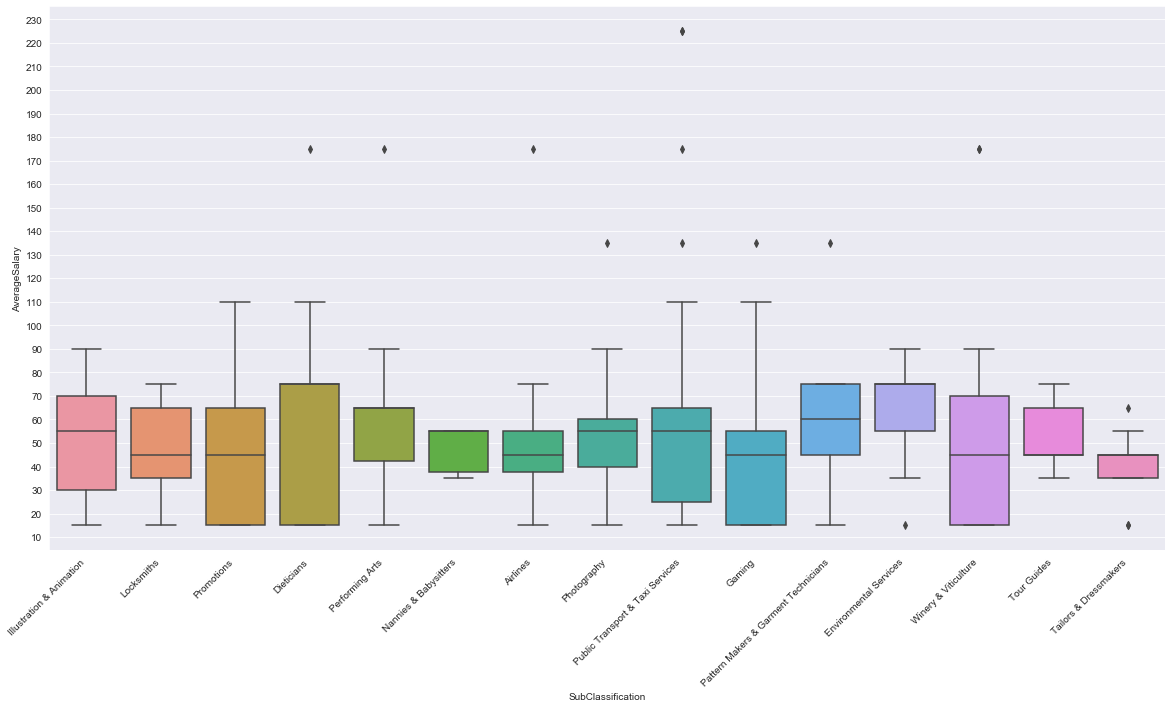

In [89]:
# visualise the boxplot of average salary vs classification for the reduced intake jobs
f, ax = plt.subplots(1, 1, figsize=(20,10))

sns.boxplot(x="SubClassification",y="AverageSalary",data=reduced_df,ax=ax)
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

plt.xticks(rotation=45,  horizontalalignment='right')

plt.show()

In [90]:
# Sort by job count - get top 50 by count
employ_df_topcount=employ_df.sort_values(by="Count",ascending=False)[:50]

In [91]:
# Quantile_25 showing higher paid jobs
# Top 15 out of the 50 highest job count
# These subclassification have a high job count and higher salary and therefore should have extended intake for their majors
extended=employ_df_topcount.sort_values(by="Quantile_25",ascending=False)[:15]
extended

,Quantile_25,Quantile_75,Count
SubClassification,,,
General Practitioners,175.0,225.0,718
Architects,135.0,225.0,1058
Programme & Project Management,110.0,175.0,1549
Financial Managers & Controllers,110.0,175.0,646
Consultants,90.0,175.0,821
Engineering - Software,90.0,175.0,1068
Developers/Programmers,90.0,175.0,2967
Business/Systems Analysts,90.0,175.0,1967
Project Management,90.0,175.0,1724


In [92]:
# list the jobs associated with the extended intake list
extended_lst=list(extended.index)
extended_df=employability[employability["SubClassification"].isin(extended_lst)]

extended_df

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Month,DateDay,DayofWeek
127,37404230,Systems Engineer,Humanised Group,2018-10-07,Brisbane,CBD & Inner Suburbs,Information & Communication Technology,Networks & Systems Administration,Systems Engineer to work on BAU/Projects for a...,<strong>The Company</strong><br> <br> This org...,0,30,Full Time,15,October,07,Sunday
130,37404370,Operations Delivery Manager,Woolworths Group,2018-10-07,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Programme & Project Management,Ready for a challenge? Opportunity to be a par...,<p> </p>\n <div></div>\n <div></...,0,30,Full Time,15,October,07,Sunday
156,37404252,SAM Consultant,Insight Enterprises Australia Pty Ltd,2018-10-07,Sydney,Southern Suburbs & Sutherland Shire,Information & Communication Technology,Consultants,Great opportunity for SAM Consultant with Flex...,There has never been a better time than now to...,0,30,Full Time,15,October,07,Sunday
161,37404304,Integration Designer,Capgemini Australia Pty Ltd,2018-10-07,Melbourne,CBD & Inner Suburbs,Information & Communication Technology,Architects,Currently looking for an Integration Designer/...,<p><strong>About the Team</strong></p>\n ...,0,30,Full Time,15,October,07,Sunday
162,37404331,Site Foreman,THE BMD GROUP,2018-10-07,Adelaide,NaN,Construction,Foreperson/Supervisors,At BMD we offer the security of a permanent ca...,<h2><strong>About the Company</strong></h2>\n ...,0,30,Full Time,15,October,07,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149965,37709348,Security Business Analyst,Hydrogen Group Pty Ltd,2018-11-13,Melbourne,NaN,Information & Communication Technology,Business/Systems Analysts,A new role has just arisen for a Security Busi...,<p> </p>\n <h2><em><strong>SECURITY BUS...,0,30,Contract/Temp,15,November,13,Tuesday
149973,37709338,Full Stack Software Developer - Airline Tech,TMS Consulting,2018-11-13,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Developers/Programmers,Leading Airline Tech Company | Innovative and ...,<p><strong>The Company and Role:</strong><br>O...,0,30,Full Time,15,November,13,Tuesday
149976,37709335,UX Designer,Talent – Winner ‘Seek Large Recruitment Agency...,2018-11-13,Perth,NaN,Information & Communication Technology,Developers/Programmers,"Seeking a guru in UX research, design and anal...",A unique opportunity has arisen to join a team...,0,30,Full Time,15,November,13,Tuesday
149982,37709328,Trade Assistant - Mechanical - Metro Workshop,Corestaff Perth,2018-11-13,Perth,Fremantle & Southern Suburbs,"Mining, Resources & Energy",Mining - Engineering & Maintenance,Seeking an experienced Mechanical T/A for imme...,"<p style=""text-align:center;"">We are currently...",0,30,Contract/Temp,15,November,13,Tuesday


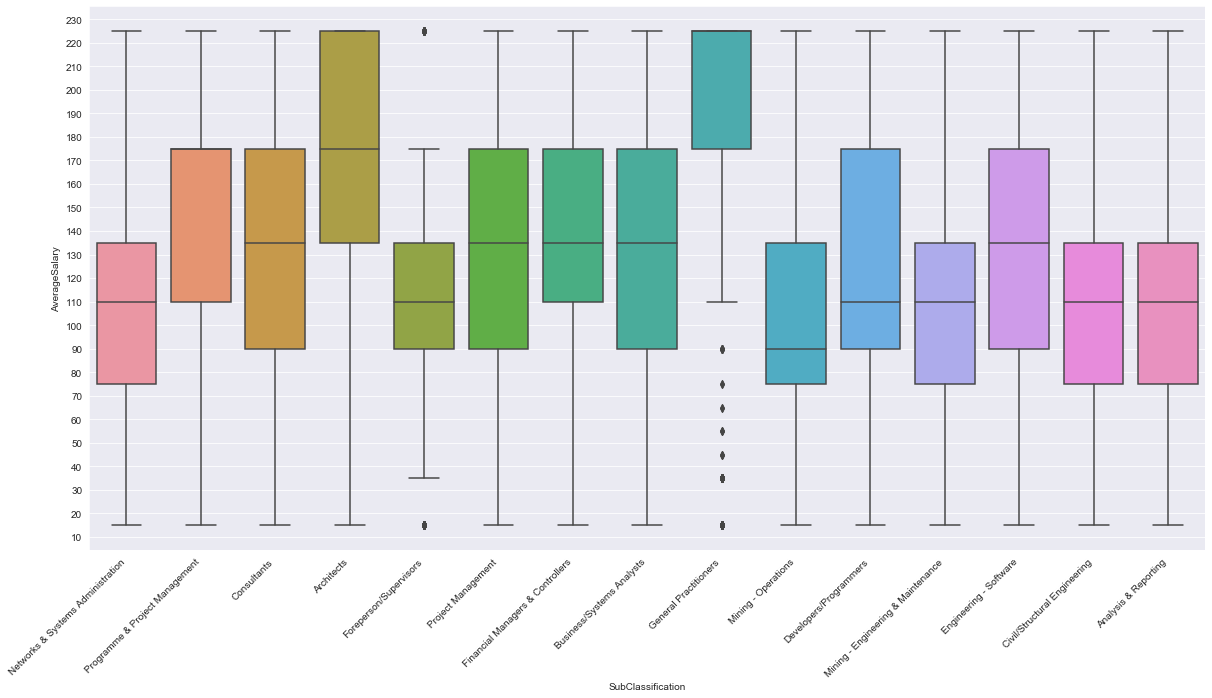

In [93]:
# visualise the boxplot of average salary vs classification for the extended intake jobs
f, ax = plt.subplots(1, 1, figsize=(20,10))

sns.boxplot(x="SubClassification",y="AverageSalary",data=extended_df,ax=ax)
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

plt.xticks(rotation=45,  horizontalalignment='right')

plt.show()

In [94]:
import datetime
# Create a column for the Week Number(of the year) based on the Date column
data['WeekNumber'] = data['Date'].apply(lambda x: str(x.isocalendar()[1]))

In [95]:
# We need to clean so that we only have full weeks (mon to sun)
# we will remove week 46 as this only includes two days mon and tue
data_whole_weeks = data[data['WeekNumber']!='46']

# we now have 40 to 45 - 6 full weeks

In [96]:
# new dataframe with only 'SubClassification' == "General Practitioners"
# This subclassificaiton has good pay and many jobs
gp_data= data_whole_weeks[data_whole_weeks['SubClassification'] == "General Practitioners" ]

# Grouped by weeknumber with a count of Job posts('Id')
gp_countbyweek = gp_data.groupby(['WeekNumber']).count()[['Id']] 
gp_countbyweek
# we now have a count of jobs per week for General Practitioners

,Id
WeekNumber,
40,131
41,139
42,158
43,124
44,148
45,77


In [97]:
# set a numbered index - so we have have two columns
gp_countbyweek = pd.DataFrame(gp_countbyweek.reset_index())
gp_countbyweek

,WeekNumber,Id
0,40,131
1,41,139
2,42,158
3,43,124
4,44,148
5,45,77


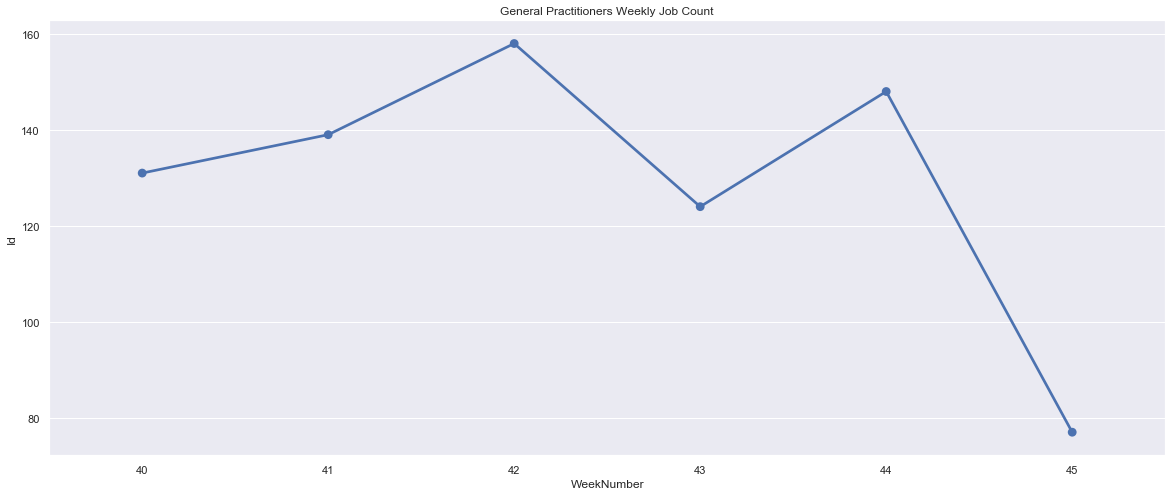

In [98]:
plt.figure(figsize=(20,8))
sns.set()
sns.pointplot(x="WeekNumber", y="Id", data=gp_countbyweek,)
#plt.xticks(rotation=45,  horizontalalignment='right')
plt.title('General Practitioners Weekly Job Count')


plt.show()

In [99]:
from sklearn.linear_model import LinearRegression
X = gp_countbyweek.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = gp_countbyweek.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
Y_pred

array([[149.28571429],
       [141.37142857],
       [133.45714286],
       [125.54285714],
       [117.62857143],
       [109.71428571]])

In [100]:
# Add our Y pred numpy array into our dataframe as a column
gp_countbyweek['LinearRegressor'] = pd.DataFrame(Y_pred)
gp_countbyweek

,WeekNumber,Id,LinearRegressor
0,40,131,149.285714
1,41,139,141.371429
2,42,158,133.457143
3,43,124,125.542857
4,44,148,117.628571
5,45,77,109.714286


Text(0, 0.5, 'Job Count')

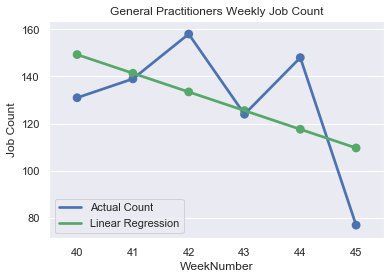

In [101]:
f,ax = plt.subplots(1,1)
sns.pointplot(x='WeekNumber', y='Id', data=gp_countbyweek, color='b')
sns.pointplot(x='WeekNumber', y='LinearRegressor', data=gp_countbyweek, color='g')
ax.legend(handles=ax.lines[::len(gp_countbyweek)+1], labels=["Actual Count", "Linear Regression"])
plt.title('General Practitioners Weekly Job Count')
plt.ylabel('Job Count')

# We note a negative Linear Regression - indicating that jobs count is likley to fall into the future
# perhaps not the best Major to extend!
# we only have 6 weeks of data

In [102]:
# Function to accept a subclass and the whole weeks dataframe and output actual and linear regression plot
def subclass_linear_regression(subclassification, data_whole_weeks ):
	subclass_data= data_whole_weeks[data_whole_weeks['SubClassification'] == subclassification]

	# Grouped by weeknumber with a count of Job posts('Id')
	subclass_countbyweek = subclass_data.groupby(['WeekNumber']).count()[['Id']] 

	# set a numbered index - so we have have two columns
	subclass_countbyweek = pd.DataFrame(subclass_countbyweek.reset_index())

	# Perform linear regression
	X = subclass_countbyweek.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
	Y = subclass_countbyweek.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
	linear_regressor = LinearRegression()  # create object for the class
	linear_regressor.fit(X, Y)  # perform linear regression
	Y_pred = linear_regressor.predict(X)  # make predictions
	Y_pred

	# Add our Y pred numpy array into our dataframe as a column
	subclass_countbyweek['LinearRegressor'] = pd.DataFrame(Y_pred)

	f,ax = plt.subplots(1,1)
	sns.pointplot(x='WeekNumber', y='Id', data=subclass_countbyweek, color='b')
	sns.pointplot(x='WeekNumber', y='LinearRegressor', data=subclass_countbyweek, color='g')
	ax.legend(handles=ax.lines[::len(subclass_countbyweek)+1], labels=["Actual Count", "Linear Regression"])
	plt.title('SubClass Weekly Job Count')
	plt.ylabel('Job Count')

Text(0, 0.5, 'Job Count')

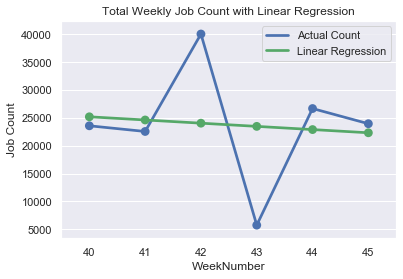

In [103]:
### Here we conduct linear regression on ALL job posts in our full 6 weeks

# Grouped by weeknumber with a count of Job posts('Id')
countbyweek = data_whole_weeks.groupby(['WeekNumber']).count()[['Id']] 

# set a numbered index - so we have have two columns
countbyweek = pd.DataFrame(countbyweek.reset_index())

# Perform linear regression
X = countbyweek.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = countbyweek.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
Y_pred

# Add our Y pred numpy array into our dataframe as a column
countbyweek['LinearRegressor'] = pd.DataFrame(Y_pred)

f,ax = plt.subplots(1,1)
sns.pointplot(x='WeekNumber', y='Id', data=countbyweek, color='b')
sns.pointplot(x='WeekNumber', y='LinearRegressor', data=countbyweek, color='g')
ax.legend(handles=ax.lines[::len(countbyweek)+1], labels=["Actual Count", "Linear Regression"])
plt.title('Total Weekly Job Count with Linear Regression')
plt.ylabel('Job Count')

# We should take note of the very small negative trend on job posts overall

In [ ]:
# Top 5 to Extend (plus GP done already - refer above)

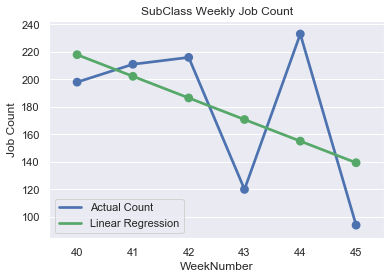

In [104]:
subclass_linear_regression("Architects",data_whole_weeks)

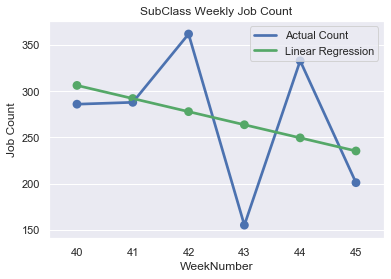

In [105]:
subclass_linear_regression("Programme & Project Management",data_whole_weeks)

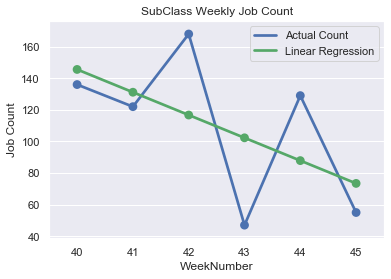

In [106]:
subclass_linear_regression("Financial Managers & Controllers",data_whole_weeks)

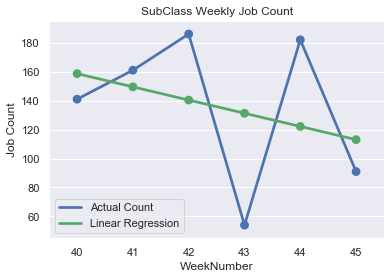

In [107]:
subclass_linear_regression("Consultants",data_whole_weeks)

In [ ]:
# Top 5 to Reduce

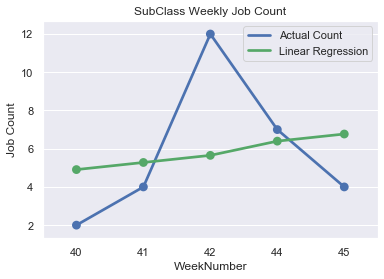

In [108]:
subclass_linear_regression("Tailors & Dressmakers",data_whole_weeks)

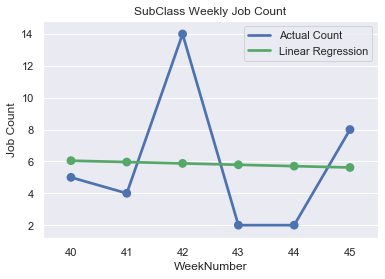

In [109]:
subclass_linear_regression("Performing Arts",data_whole_weeks)

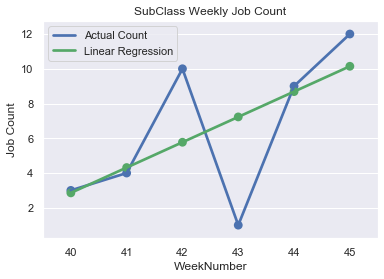

In [110]:
subclass_linear_regression("Airlines",data_whole_weeks)

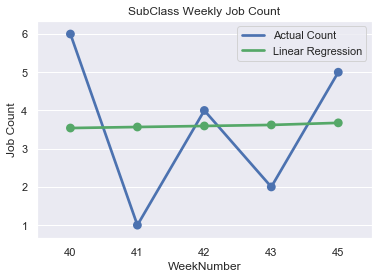

In [113]:
subclass_linear_regression("Nannies & Babysitters",data_whole_weeks)

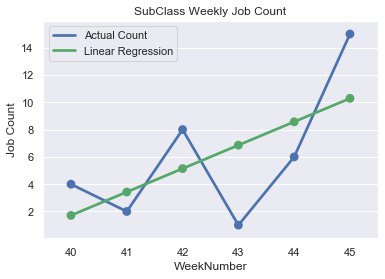

In [112]:
subclass_linear_regression("Photography",data_whole_weeks)